<a href="https://colab.research.google.com/github/isi1993/DRRR/blob/main/PORTFOLIO_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from bs4 import BeautifulSoup
import requests
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
import pandas as pd

import warnings
warnings.simplefilter("ignore")

In [ ]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"


In [ ]:
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')

In [ ]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"


In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# CHECK THE SSHAPE OF THE DATASET
df.shape

(65457, 114)

In [ ]:
# CHEACK THE INFORMAION OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [ ]:
# cheack for the data types of various columns
df.dtypes

,0
ResponseId,int64
MainBranch,object
Age,object
Employment,object
RemoteWork,object
...,...
JobSatPoints_11,float64
SurveyLength,object
SurveyEase,object
ConvertedCompYearly,float64


cheack the unique entries of the various columns and replacing the missing value

In [ ]:
df['RemoteWork'].unique()

array(['Remote', nan, 'In-person', 'Hybrid (some remote, some in-person)'],
      dtype=object)

In [ ]:
df["RemoteWork"] = df["RemoteWork"].fillna("Prefer_not_to_say")

In [ ]:
df['RemoteWork'].unique()

array(['Remote', 'Prefer_not_to_say', 'In-person',
       'Hybrid (some remote, some in-person)'], dtype=object)

# clean the edlevel column

In [ ]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [ ]:
EdLevel_corrections = {
    "PRIMARY/ELEMENTARY SCHOOL": "Primary Education",
    "BACHELOR’S DEGREE (B.A., B.S., B.ENG., ETC.)": "Bachelor’s Degree",
    "SOME COLLEGE/UNIVERSITY STUDY WITHOUT EARNING A DEGREE": "DropOut",
    "SECONDARY SCHOOL (E.G. AMERICAN HIGH SCHOOL, GERMAN REALSCHULE OR GYMNASIUM, ETC.)": "Secondary Education",
    "PROFESSIONAL DEGREE (JD, MD, PH.D, ED.D, ETC.)": "Professional Degree",
    "ASSOCIATE DEGREE (A.A., A.S., ETC.)": "Associate Degree",
    "MASTER’S DEGREE (M.A., M.S., M.ENG., MBA, ETC.)": "Master’s Degree",
    "SOMETHING ELSE": "Prefer not to say"

}
# Standardize brand column: convert to uppercase first for consistency
df["EdLevel"] = df["EdLevel"].str.upper().replace(EdLevel_corrections)






In [ ]:
df["EdLevel"].unique()

array(['Primary Education', 'Bachelor’s Degree', 'Master’s Degree',
       'DropOut', 'Secondary Education', 'Professional Degree',
       'Associate Degree', 'Prefer not to say', nan], dtype=object)

In [ ]:
# Replace the missing the value in the EdLevel
df["EdLevel"] = df["EdLevel"].fillna("UNKNOWN")

In [ ]:
# replce the missing value
df["LearnCode"] = df["LearnCode"].fillna("Prefer_not_to_say")

In [ ]:
df['LearnCode'].isnull().sum()

np.int64(0)

In [ ]:
df["YearsCode"] = df["YearsCode"].bfill()

In [ ]:
df['YearsCode'].isnull().sum()

np.int64(0)

In [ ]:
df["DevType"].unique()

array([nan, 'Developer, full-stack', 'Developer Experience', 'Student',
       'Academic researcher', 'Project manager', 'Developer Advocate',
       'Developer, back-end', 'Other (please specify):',
       'Developer, front-end', 'Database administrator',
       'Developer, desktop or enterprise applications',
       'Cloud infrastructure engineer',
       'Data scientist or machine learning specialist',
       'Research & Development role',
       'Developer, embedded applications or devices',
       'System administrator', 'DevOps specialist', 'Engineering manager',
       'Designer', 'Security professional',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer, mobile',
       'Developer, game or graphics', 'Data or business analyst',
       'Educator', 'Developer, QA or test', 'Product manager',
       'Developer, AI', 'Scientist', 'Engineer, site reliability',
       'Blockchain', 'Marketing or sales professional',
       'Hardware Engineer', 'Data engineer'], dtype=object)

# group the various Tech role

In [ ]:
def group_role(role):
    if pd.isna(role):
        return "Other / Unknown"

    role = role.lower()

    if "student" in role:
        return "Student"

    if "developer" in role:
        return "Software Developer"

    if any(k in role for k in ["data scientist", "machine learning", "data engineer", "data analyst"]):
        return "Data & AI"

    if any(k in role for k in ["devops", "cloud", "site reliability", "system administrator", "database administrator"]):
        return "Infrastructure & DevOps"

    if any(k in role for k in ["engineering manager", "product manager", "project manager", "executive", "c-suite", "vp"]):
        return "Management & Leadership"

    if any(k in role for k in ["academic", "research", "scientist", "educator", "r&d"]):
        return "Research & Academia"

    if "designer" in role:
        return "Design & UX"

    if "security" in role:
        return "Security"

    if any(k in role for k in ["developer advocate", "developer experience"]):
        return "Developer Relations"

    if any(k in role for k in ["marketing", "sales"]):
        return "Business & Sales"

    if any(k in role for k in ["hardware", "blockchain"]):
        return "Hardware & Blockchain"

    return "Other / Unknown"

In [ ]:
df['DevType'] = df['DevType'].apply(group_role)

In [ ]:
df["DevType"].unique()

array(['Other / Unknown', 'Software Developer', 'Student',
       'Research & Academia', 'Management & Leadership',
       'Infrastructure & DevOps', 'Data & AI', 'Design & UX', 'Security',
       'Hardware & Blockchain', 'Business & Sales'], dtype=object)

In [ ]:
# clean the organisation size column
df['OrgSize'].unique()

array([nan, '100 to 499 employees', '2 to 9 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10 to 19 employees', '20 to 99 employees',
       '5,000 to 9,999 employees', '1,000 to 4,999 employees',
       'I don’t know', '10,000 or more employees', '500 to 999 employees'],
      dtype=object)

In [ ]:
df["OrgSize"] = df["OrgSize"].replace(
    {"Just me - I am a freelancer, sole proprietor, etc." : "Freelancer"})

In [ ]:
# replce the missing value
df["OrgSize"] = df["OrgSize"].fillna("Prefer_not_to_say")

In [ ]:
df["OrgSize"].value_counts()

,count
OrgSize,
Prefer_not_to_say,17969
20 to 99 employees,9754
100 to 499 employees,8698
"10,000 or more employees",5558
"1,000 to 4,999 employees",5354
2 to 9 employees,4834
10 to 19 employees,4085
500 to 999 employees,3183
Freelancer,3086


In [ ]:
df['PurchaseInfluence'].unique()

array([nan, 'I have some influence', 'I have little or no influence',
       'I have a great deal of influence'], dtype=object)

In [ ]:
df["PurchaseInfluence"] = df["PurchaseInfluence"].replace(
    {"I have some influence" : "Good Influence",
    "I have little or no influence" : "Weak Infuence",
    "I have a great deal of influence" : "Strong Influence"})

In [ ]:
df["PurchaseInfluence"].unique()

array([nan, 'Good Influence', 'Weak Infuence', 'Strong Influence'],
      dtype=object)

In [ ]:
# replce the missing value
df["PurchaseInfluence"] = df["PurchaseInfluence"].fillna("Prefer_not_to_say")

In [ ]:
df["PurchaseInfluence"].unique()

array(['Prefer_not_to_say', 'Good Influence', 'Weak Infuence',
       'Strong Influence'], dtype=object)

In [ ]:
df["Country"].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [ ]:
# Mapping dictionary: long names -> concise names
country_mapping = {
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Iran, Islamic Republic of...': 'Iran',
    'Republic of Korea': 'South Korea',
    "Democratic People's Republic of Korea": 'North Korea',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
    'United Republic of Tanzania': 'Tanzania',
    "Côte d'Ivoire": "Ivory Coast",
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Lao People\'s Democratic Republic': 'Laos',
    'Libyan Arab Jamahiriya': 'Libya',
    'Brunei Darussalam': 'Brunei',
    'Micronesia, Federated States of...': 'Micronesia',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Republic of Moldova': 'Moldova',
    'Democratic Republic of the Congo': 'DR Congo',
    'Congo, Republic of the...': 'Republic of Congo',
    'Palestine': 'Palestine',
    'Syrian Arab Republic': 'Syria',
    'North Korea': 'North Korea',
    'South Korea': 'South Korea'
    # You can add more mappings as needed
}

# Replace using the mapping; keep original if not in mapping
df["country_clean"] = df["Country"].replace(country_mapping)


print(df[["country_clean"]].head())

    country_clean
0   United States
1  United Kingdom
2  United Kingdom
3          Canada
4          Norway


In [ ]:
df['country_clean'].unique()

array(['United States', 'United Kingdom', 'Canada', 'Norway',
       'Uzbekistan', 'Serbia', 'Poland', 'Philippines', 'Bulgaria',
       'Switzerland', 'India', 'Germany', 'Ireland', 'Italy', 'Ukraine',
       'Australia', 'Brazil', 'Japan', 'Austria', 'Iran', 'France',
       'Saudi Arabia', 'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden',
       'Netherlands', 'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia', 'Russia',
       'Greece', 'Israel', 'Belgium', 'Mexico', 'Tanzania', 'Hungary',
       'Argentina', 'Portugal', 'Sri Lanka', 'Latvia', 'China',
       'Singapore', 'Lebanon', 'Spain', 'South Africa', 'Lithuania',
       'Vietnam', 'Dominican Republic', 'Indonesia', 'Kosovo', 'Morocco',
       'Taiwan', 'Georgia', 'San Marino', 'Tunisia', 'Bangladesh',
       'Nigeria', 'Liechtenstein', 'Denmark', 'Ecuador', 'Malaysia',
       'Albania', 'Azerbaijan', 'Chile', 'Ghana', 'Peru', 'Bolivia',
       'Egypt', 'Luxembourg', 'Montene

In [ ]:
# replce the missing value
df["country_clean"] = df["country_clean"].fillna("Unknown")

In [ ]:
import numpy as np

continent_mapping = {
    # North America
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Costa Rica': 'North America', 'Guatemala': 'North America', 'El Salvador': 'North America',
    'Jamaica': 'North America', 'Nicaragua': 'North America', 'Honduras': 'North America',
    'Bahamas': 'North America', 'Barbados': 'North America', 'Belize': 'North America',
    'Antigua and Barbuda': 'North America', 'Saint Kitts and Nevis': 'North America',
    'Dominica': 'North America', 'Cuba': 'North America', 'Panama': 'North America',
    'Dominican Republic': 'North America', 'Haiti': 'North America',

    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Chile': 'South America',
    'Colombia': 'South America', 'Peru': 'South America', 'Bolivia': 'South America',
    'Venezuela': 'South America', 'Ecuador': 'South America', 'Paraguay': 'South America',
    'Uruguay': 'South America', 'Guyana': 'South America', 'Suriname': 'South America',

    # Europe
    'United Kingdom': 'Europe', 'Norway': 'Europe', 'Serbia': 'Europe', 'Poland': 'Europe',
    'Bulgaria': 'Europe', 'Switzerland': 'Europe', 'Germany': 'Europe', 'Ireland': 'Europe',
    'Italy': 'Europe', 'Ukraine': 'Europe', 'Austria': 'Europe', 'France': 'Europe', 'Romania': 'Europe',
    'Turkey': 'Europe', 'Sweden': 'Europe', 'Netherlands': 'Europe', 'Croatia': 'Europe',
    'Czech Republic': 'Europe', 'Republic of North Macedonia': 'Europe', 'Finland': 'Europe',
    'Slovakia': 'Europe', 'Russia': 'Europe', 'Greece': 'Europe', 'Belgium': 'Europe', 'Hungary': 'Europe',
    'Latvia': 'Europe', 'Lithuania': 'Europe', 'Kosovo': 'Europe', 'Montenegro': 'Europe',
    'Albania': 'Europe', 'Slovenia': 'Europe', 'Cyprus': 'Europe', 'Liechtenstein': 'Europe',
    'San Marino': 'Europe', 'Andorra': 'Europe', 'Monaco': 'Europe', 'Isle of Man': 'Europe', 'Malta': 'Europe',

    # Asia
    'India': 'Asia', 'Japan': 'Asia', 'Iran': 'Asia', 'Nepal': 'Asia', 'Pakistan': 'Asia',
    'Sri Lanka': 'Asia', 'China': 'Asia', 'Singapore': 'Asia', 'Lebanon': 'Asia', 'Thailand': 'Asia',
    'Vietnam': 'Asia', 'Indonesia': 'Asia', 'Taiwan': 'Asia', 'Israel': 'Asia', 'Georgia': 'Asia',
    'Bangladesh': 'Asia', 'Malaysia': 'Asia', 'Armenia': 'Asia', 'United Arab Emirates': 'Asia',
    'Maldives': 'Asia', 'Bhutan': 'Asia', 'Laos': 'Asia', 'Mongolia': 'Asia', 'Cambodia': 'Asia',
    'South Korea': 'Asia', 'North Korea': 'Asia', 'Turkmenistan': 'Asia', 'Kuwait': 'Asia', 'Tajikistan': 'Asia',
    'Oman': 'Asia', 'Qatar': 'Asia', 'Afghanistan': 'Asia', 'Iraq': 'Asia', 'Palestine': 'Asia',

    # Africa
    'Algeria': 'Africa', 'South Africa': 'Africa', 'Morocco': 'Africa', 'Tunisia': 'Africa',
    'Nigeria': 'Africa', 'Tanzania': 'Africa', 'Rwanda': 'Africa', 'Ethiopia': 'Africa',
    'Kenya': 'Africa', 'Ghana': 'Africa', 'Egypt': 'Africa', 'Zimbabwe': 'Africa',
    'Namibia': 'Africa', 'Swaziland': 'Africa', 'Ivory Coast': 'Africa', 'Libya': 'Africa',
    'Mauritius': 'Africa', 'Madagascar': 'Africa', 'Angola': 'Africa', 'DR Congo': 'Africa',
    'Senegal': 'Africa', 'Zambia': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa',
    'Central African Republic': 'Africa', 'Equatorial Guinea': 'Africa', 'Guinea-Bissau': 'Africa',
    'Mozambique': 'Africa', 'Mauritania': 'Africa', 'Sierra Leone': 'Africa', 'Togo': 'Africa',
    'Burkina Faso': 'Africa', 'Niger': 'Africa', 'Gabon': 'Africa', 'Benin': 'Africa', 'Malawi': 'Africa',
    'Liberia': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Fiji': 'Oceania', 'Samoa': 'Oceania',
    'Nauru': 'Oceania', 'Papua New Guinea': 'Oceania', 'Solomon Islands': 'Oceania', 'Micronesia': 'Oceania',

    # Other / Unknown
    'Nomadic': 'Unknown', np.nan: 'Unknown'
}

# Map countries to continents
df["Continent"] = df["Country"].map(continent_mapping)

# Check result
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment         RemoteWork   Check  \
0  Employed, full-time             Remote  Apples   
1  Employed, full-time             Remote  Apples   
2  Employed, full-time             Remote  Apples   
3   Student, full-time  Prefer_not_to_say  Apples   
4   Student, full-time  Prefer_not_to_say  Apples   

                                    CodingActivities              EdLevel  \
0                                              Hobby    Primary Education   
1  Hobby;Contribute to open-source projects;Other...    Bachelor’s Degree   
2  Hobby;Contribute to open-source 

In [ ]:
# replace the missing value
df["Continent"] = df["Continent"].fillna("Unknown")

In [ ]:
df["Continent"].unique()

array(['Unknown', 'North America', 'Europe', 'Asia', 'Oceania',
       'South America', 'Africa'], dtype=object)

In [ ]:
df['Currency'].unique()

array([nan, 'PKR\tPakistani rupee', 'EUR European Euro',
       'USD\tUnited States dollar', 'BRL\tBrazilian real',
       'GBP\tPound sterling', 'RON\tRomanian leu', 'INR\tIndian rupee',
       'CHF\tSwiss franc', 'TRY\tTurkish lira', 'RUB\tRussian ruble',
       'ZAR\tSouth African rand', 'CZK\tCzech koruna',
       'CAD\tCanadian dollar', 'IRR\tIranian rial', 'MXN\tMexican peso',
       'UAH\tUkrainian hryvnia', 'DOP\tDominican peso',
       'KMF\tComorian franc', 'RSD\tSerbian dinar', 'PEN\tPeruvian sol',
       'MAD\tMoroccan dirham', 'GEL\tGeorgian lari', 'PLN\tPolish zloty',
       'SAR\tSaudi Arabian riyal', 'SEK\tSwedish krona',
       'BGN\tBulgarian lev', 'KZT\tKazakhstani tenge',
       'SGD\tSingapore dollar', 'JOD\tJordanian dinar',
       'JPY\tJapanese yen', 'NOK\tNorwegian krone',
       'ILS\tIsraeli new shekel', 'DKK\tDanish krone', 'THB\tThai baht',
       'RWF\tRwandan franc', 'HUF\tHungarian forint',
       'BDT\tBangladeshi taka', 'IDR\tIndonesian rupiah',
      

In [ ]:
# Assuming gf__clean is your existing dataframe with a 'currency' column

# Create a new column with the cleaned currency code
df['Currency_Clean'] = df['Currency'].str.extract(r'^([A-Z]{3}|none)')

# Check the first few rows
print(df[['Currency', 'Currency_Clean']].head())

  Currency Currency_Clean
0      NaN            NaN
1      NaN            NaN
2      NaN            NaN
3      NaN            NaN
4      NaN            NaN


In [ ]:
df["Currency_Clean"].unique()

array([nan, 'PKR', 'EUR', 'USD', 'BRL', 'GBP', 'RON', 'INR', 'CHF', 'TRY',
       'RUB', 'ZAR', 'CZK', 'CAD', 'IRR', 'MXN', 'UAH', 'DOP', 'KMF',
       'RSD', 'PEN', 'MAD', 'GEL', 'PLN', 'SAR', 'SEK', 'BGN', 'KZT',
       'SGD', 'JOD', 'JPY', 'NOK', 'ILS', 'DKK', 'THB', 'RWF', 'HUF',
       'BDT', 'IDR', 'BAM', 'PHP', 'XOF', 'DZD', 'TND', 'MYR', 'BHD',
       'ARS', 'NIO', 'AFN', 'UYU', 'BYN', 'COP', 'ALL', 'AUD', 'UZS',
       'NZD', 'MVR', 'GHS', 'AED', 'NGN', 'FJD', 'GTQ', 'UGX', 'CRC',
       'MUR', 'KES', 'EGP', 'TWD', 'AMD', 'KRW', 'CLP', 'ISK', 'HNL',
       'HKD', 'CNY', 'VND', 'BSD', 'LKR', 'BTN', 'MNT', 'KHR', 'NPR',
       'BOB', 'ETB', 'AOA', 'MKD', 'SYP', 'NAD', 'ANG', 'TJS', 'BIF',
       'JMD', 'TTD', 'SLL', 'SRD', 'GYD', 'KGS', 'ZMW', 'MDL', 'OMR',
       'CUP', 'XPF', 'KYD', 'TZS', 'KWD', 'TMT', 'QAR', 'YER', 'MWK',
       'IQD', 'IMP', 'KPW', 'XAF', 'MGA', 'PYG', 'ERN', 'MMK', 'SHP',
       'MZN', 'none', 'AZN', 'LYD', 'MOP', 'LBP', 'BND', 'VES', 'SOS',
       'CDF', 

In [ ]:
# replce the missing value
df["Currency_Clean"] = df["Currency_Clean"].fillna("Unknown")

In [ ]:
df["Currency_Clean"].unique()

array(['Unknown', 'PKR', 'EUR', 'USD', 'BRL', 'GBP', 'RON', 'INR', 'CHF',
       'TRY', 'RUB', 'ZAR', 'CZK', 'CAD', 'IRR', 'MXN', 'UAH', 'DOP',
       'KMF', 'RSD', 'PEN', 'MAD', 'GEL', 'PLN', 'SAR', 'SEK', 'BGN',
       'KZT', 'SGD', 'JOD', 'JPY', 'NOK', 'ILS', 'DKK', 'THB', 'RWF',
       'HUF', 'BDT', 'IDR', 'BAM', 'PHP', 'XOF', 'DZD', 'TND', 'MYR',
       'BHD', 'ARS', 'NIO', 'AFN', 'UYU', 'BYN', 'COP', 'ALL', 'AUD',
       'UZS', 'NZD', 'MVR', 'GHS', 'AED', 'NGN', 'FJD', 'GTQ', 'UGX',
       'CRC', 'MUR', 'KES', 'EGP', 'TWD', 'AMD', 'KRW', 'CLP', 'ISK',
       'HNL', 'HKD', 'CNY', 'VND', 'BSD', 'LKR', 'BTN', 'MNT', 'KHR',
       'NPR', 'BOB', 'ETB', 'AOA', 'MKD', 'SYP', 'NAD', 'ANG', 'TJS',
       'BIF', 'JMD', 'TTD', 'SLL', 'SRD', 'GYD', 'KGS', 'ZMW', 'MDL',
       'OMR', 'CUP', 'XPF', 'KYD', 'TZS', 'KWD', 'TMT', 'QAR', 'YER',
       'MWK', 'IQD', 'IMP', 'KPW', 'XAF', 'MGA', 'PYG', 'ERN', 'MMK',
       'SHP', 'MZN', 'none', 'AZN', 'LYD', 'MOP', 'LBP', 'BND', 'VES',
       'SOS', '

In [ ]:
df["Age"].value_counts()

,count
Age,
25-34 years old,23913
35-44 years old,14948
18-24 years old,14105
45-54 years old,6251
55-64 years old,2575
Under 18 years old,2570
65 years or older,773
Prefer not to say,322


In [ ]:
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Convert to numeric
df['AgeNumeric'] = df['Age'].map(age_map)

In [ ]:
df["AgeNumeric"].value_counts()

,count
AgeNumeric,
29.0,23913
39.0,14948
21.0,14105
49.0,6251
59.0,2575
15.0,2570
70.0,773


In [ ]:
df["AgeNumeric"].unique()

array([15., 39., 49., 21., 29., 59., nan, 70.])

In [ ]:
df["AgeNumeric"] = df["AgeNumeric"].bfill()


In [ ]:
df["AgeNumeric"].isnull().sum()

np.int64(0)

In [ ]:
import seaborn as sns

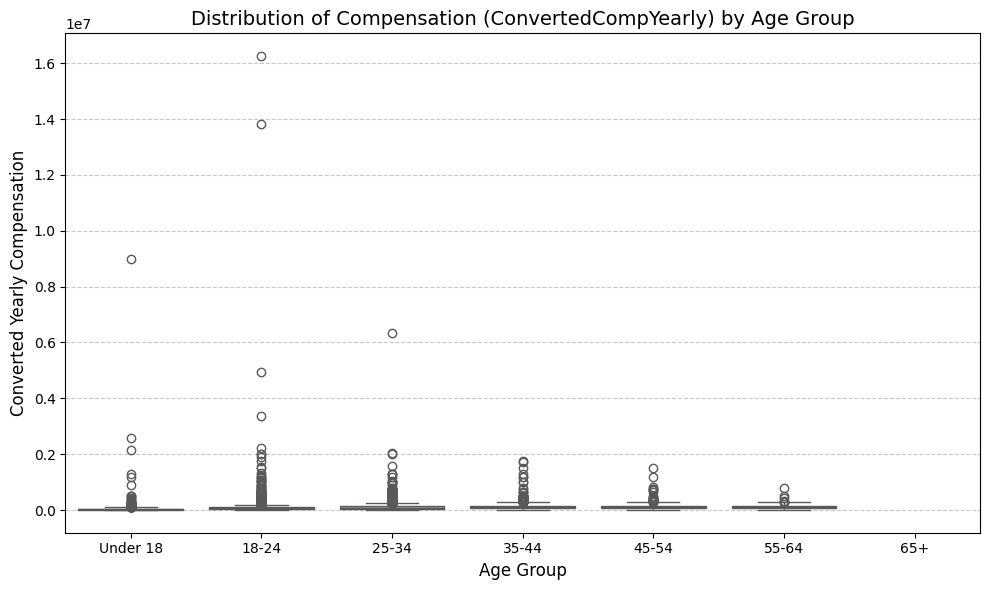

In [ ]:
# If you don't already have age groups, create them:
age_bins = [15., 21., 29., 39., 49., 59., 70., 80.] # Sorted the bins and added an upper bound
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'] # Adjusted labels to match bins
df['AgeGroup'] = pd.cut(df['AgeNumeric'], bins=age_bins, labels=age_labels, right=True, include_lowest=True) # Added include_lowest=True

# Plot: Boxplot of compensation by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='ConvertedCompYearly', palette='Set2', order=age_labels) # Changed y-axis to ConvertedCompYearly and added order

plt.title('Distribution of Compensation (ConvertedCompYearly) by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Converted Yearly Compensation', fontsize=12) # Changed y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df["JobSatPoints_10"].unique()

array([   nan,   0.  ,  10.  ,  90.  ,  40.  ,   5.  ,  60.  ,  50.  ,
        30.  ,  70.  ,  20.  , 100.  ,  80.  ,  75.  ,   2.  ,   7.  ,
        23.  ,   9.  ,  15.  ,  25.  ,   3.  ,   8.  ,   1.  ,  63.  ,
        35.  ,  11.  ,   6.  ,  14.  ,  95.  ,  99.  ,  65.  ,  13.  ,
        85.  ,  19.  ,   4.  ,  89.  ,  55.  ,  12.5 ,  12.  ,  84.  ,
        21.  ,  18.  ,  22.  ,  45.  ,  92.  ,  33.  ,  24.  ,  69.  ,
        96.  ,  77.  ,  88.  ,  78.  ,  16.  ,  17.  ,  87.  ,   1.5 ,
        81.  ,  26.  ,  54.  ,   6.25,  67.  ,  66.  ,  49.  ,  57.  ,
        32.  ,  79.  ,  94.  ,  82.  ,  98.  ,  14.5 ,  93.  ,  43.  ,
        74.  ,  97.  ,  28.  ,  34.  ])

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [ ]:
numerical_cols

['ResponseId',
 'CompTotal',
 'WorkExp',
 'JobSatPoints_1',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_6',
 'JobSatPoints_7',
 'JobSatPoints_8',
 'JobSatPoints_9',
 'JobSatPoints_10',
 'JobSatPoints_11',
 'ConvertedCompYearly',
 'JobSat',
 'AgeNumeric']

In [ ]:
numerical_cols

['ResponseId',
 'CompTotal',
 'WorkExp',
 'JobSatPoints_1',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_6',
 'JobSatPoints_7',
 'JobSatPoints_8',
 'JobSatPoints_9',
 'JobSatPoints_10',
 'JobSatPoints_11',
 'ConvertedCompYearly',
 'JobSat',
 'AgeNumeric']

In [ ]:
df["CompTotal"].value_counts()

,count
CompTotal,
100000.0,939
60000.0,839
120000.0,793
80000.0,728
50000.0,705
...,...
2588880.0,1
257292.0,1
94900.0,1


In [ ]:
numerical_cols

['ResponseId',
 'CompTotal',
 'WorkExp',
 'JobSatPoints_1',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_6',
 'JobSatPoints_7',
 'JobSatPoints_8',
 'JobSatPoints_9',
 'JobSatPoints_10',
 'JobSatPoints_11',
 'ConvertedCompYearly',
 'JobSat',
 'AgeNumeric']

In [ ]:
df[numerical_cols].describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,AgeNumeric
count,65457.000000,3.374400e+04,29664.000000,29330.000000,29399.000000,29417.000000,29456.000000,29454.000000,29462.000000,29462.000000,29456.000000,29451.000000,2.343700e+04,29131.000000,65457.000000
mean,32714.493591,2.963490e+145,11.466323,18.578998,7.520604,10.059485,24.339971,22.964277,20.279127,16.167837,10.953481,9.953618,8.615893e+04,6.934915,32.604320
std,18892.431636,5.443794e+147,9.168205,25.965347,18.421094,21.831924,27.088870,27.017634,26.110706,24.844177,22.904463,21.775070,1.867532e+05,2.088356,11.205254
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,15.000000
25%,16354.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000,21.000000
50%,32716.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000,29.000000
75%,49076.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.080000e+05,8.000000,39.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000,70.000000


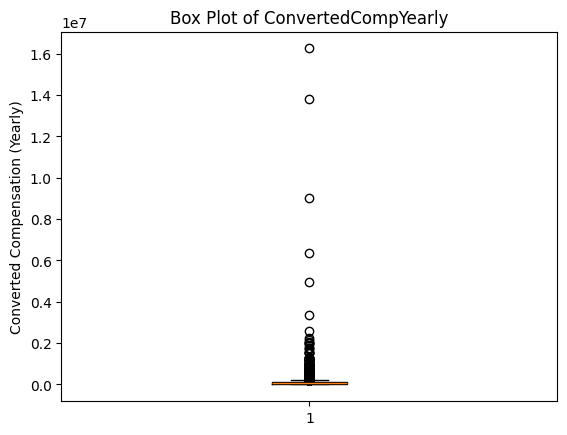

In [ ]:
# Clean the column for plotting
comp = df["ConvertedCompYearly"].dropna()
comp = comp[comp > 0]

# Create box plot
plt.figure()
plt.boxplot(comp)
plt.title("Box Plot of ConvertedCompYearly")
plt.ylabel("Converted Compensation (Yearly)")
plt.show()

In [ ]:
mode_value = df['JobSatPoints_6'].mode()
     # check if mode exists
df['JobSatPoints_6'].fillna(mode_value[0], inplace=True)

In [ ]:
df['JobSatPoints_6'].unique()

array([  0.  ,  25.  ,  30.  ,  60.  , 100.  ,  20.  ,  50.  ,  15.  ,
        10.  ,   5.  ,  80.  ,   8.  ,  65.  ,  90.  ,  75.  ,  35.  ,
        40.  ,  33.  ,  70.  ,  17.  ,   7.  ,  12.  ,  13.  ,   9.  ,
        21.  ,  18.  ,  95.  ,   2.  ,  45.  ,  34.  ,  16.  ,  78.  ,
        85.  ,   1.  ,  14.  ,  31.  ,  11.  ,  23.  ,  28.  ,  81.  ,
         6.25,   6.  ,  55.  ,   3.  ,  22.  ,  42.  ,   4.  ,  89.  ,
        99.  ,  12.5 ,  36.  ,  27.  ,  24.  ,  19.  ,  87.  ,  88.  ,
        29.  ,  33.33,  33.3 ,  37.  ,  39.  ,  77.  ,  68.  ,  26.  ,
        98.  ,  32.  ,  66.  ,  57.  ,  82.  ,  94.  ,  61.  ,  43.  ,
        69.  ,  76.  ,  73.  ,  17.5 ,  46.  ,  49.  ,  52.  ,  97.  ,
        96.  ,  67.  ,  91.  ,  86.  ,  56.  ,  41.  ,  74.  ,  51.  ,
        48.  ,  44.  ,  64.  ,  54.  ,  63.  ])

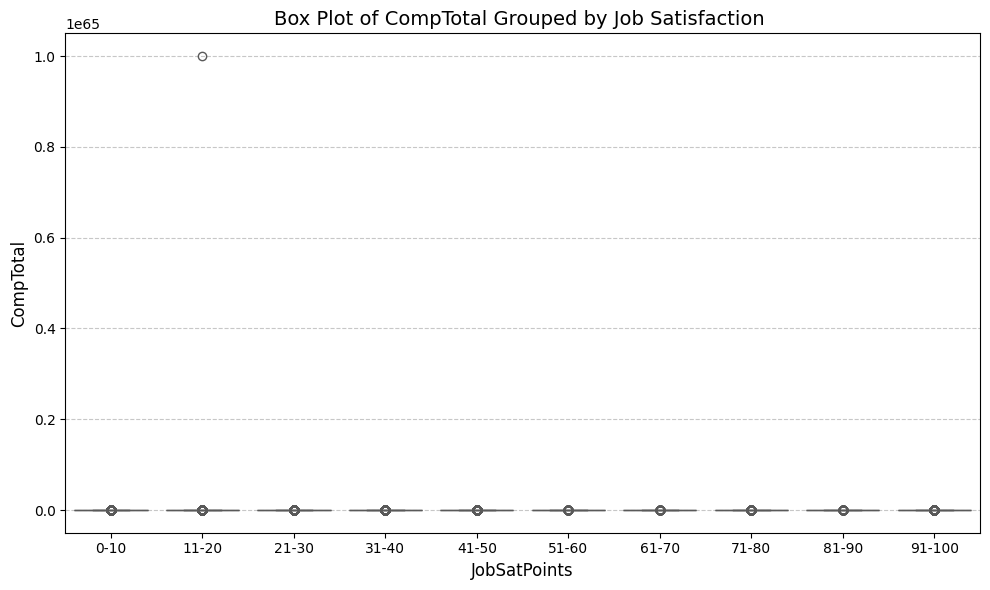

In [ ]:
# If you don't already have age groups, create them:
JobSat_bin = [0., 10., 20., 30., 40., 50., 60., 70., 80., 90., 100.] # Adjusted bins to match labels
JobSat_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['JobSatPoints'] = pd.cut(df['JobSatPoints_6'], bins=JobSat_bin, labels=JobSat_labels, right=True)

# Plot: Boxplot of compensation by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobSatPoints', y='CompTotal', palette='Set2')

plt.title('Box Plot of CompTotal Grouped by Job Satisfaction ', fontsize=14)
plt.xlabel('JobSatPoints', fontsize=12)
plt.ylabel('CompTotal', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df['AgeNumeric'].unique()

array([15., 39., 49., 21., 29., 59., 70.])

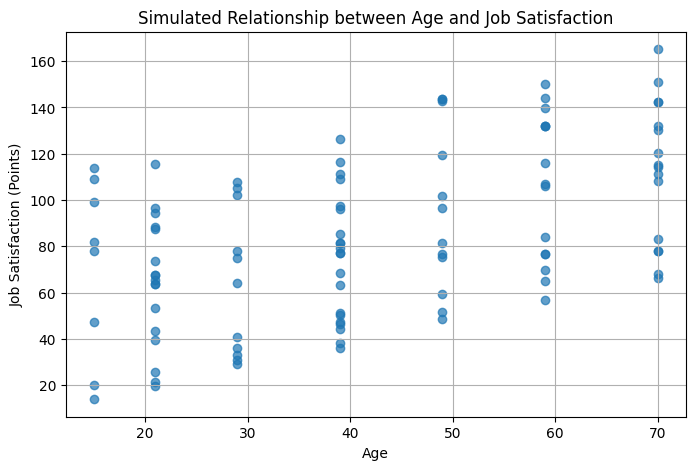

In [ ]:
# Given unique values
ages = np.array([15, 21, 29, 39, 49, 59, 70])
job_sat = np.array([0., 25., 30., 60., 100., 20., 50., 15., 10., 5., 80., 8., 65., 90., 75., 35., 40., 33., 70., 17.,
                    7., 12., 13., 9., 21., 18., 95., 2., 45., 34., 16., 78., 85., 1., 14., 31., 11., 23., 28., 81.,
                    6.25, 6., 55., 3., 22., 42., 4., 89., 99., 12.5, 36., 27., 24., 19., 87., 88., 29., 33.33, 33.3,
                    37., 39., 77., 68., 26., 98., 32., 66., 57., 82., 94., 61., 43., 69., 76., 73., 17.5, 46., 49.,
                    52., 97., 96., 67., 91., 86., 56., 41., 74., 51., 48., 44., 64., 54., 63.])

# Simulate a relationship: as age increases, satisfaction slightly increases with noise
np.random.seed(42)
simulated_data = pd.DataFrame({
    "Age": np.random.choice(ages, size=100),
    "JobSatPoints_6": np.random.choice(job_sat, size=100)
})

# Add a weak positive correlation
simulated_data["JobSatPoints_6"] += simulated_data["Age"] * np.random.uniform(0.5, 1.0)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(simulated_data["Age"], simulated_data["JobSatPoints_6"], alpha=0.7)
plt.title("Simulated Relationship between Age and Job Satisfaction")
plt.xlabel("Age")
plt.ylabel("Job Satisfaction (Points)")
plt.grid(True)
plt.show()

In [ ]:
df['ConvertedCompYearly'].unique()

array([    nan,   7322.,  30074., ...,  15637.,   9711., 116844.])

In [ ]:
df['income_group'] = df['ConvertedCompYearly'].fillna('Not reported')


In [ ]:
df['income_group'].value_counts()

,count
income_group,
Not reported,42020
64444.0,321
53703.0,308
75184.0,230
85925.0,226
...,...
105500.0,1
60863.0,1
98599.0,1


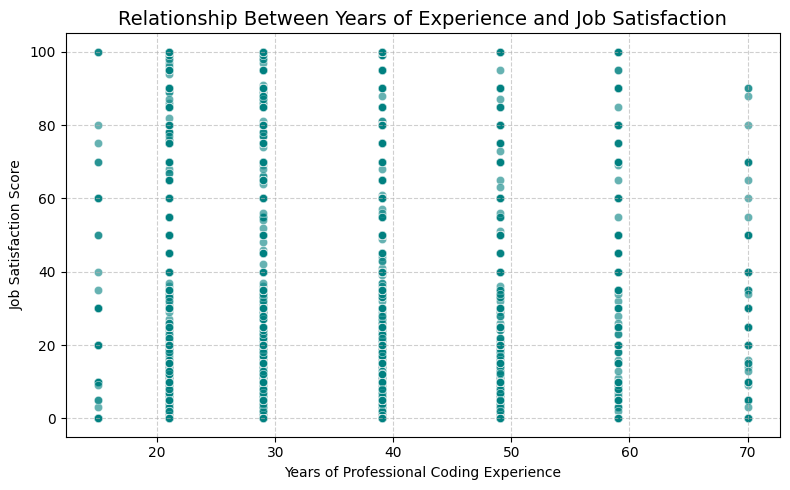

In [ ]:
#Select the columns needed for the plot
corr_df = df[['AgeNumeric', 'JobSatPoints_6']].copy()

# --- Step 4: Visualize relationship ---
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=corr_df,
    x='AgeNumeric',
    y='JobSatPoints_6',
    alpha=0.6,
    color='teal'
)
plt.title('Relationship Between Years of Experience and Job Satisfaction', fontsize=14)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

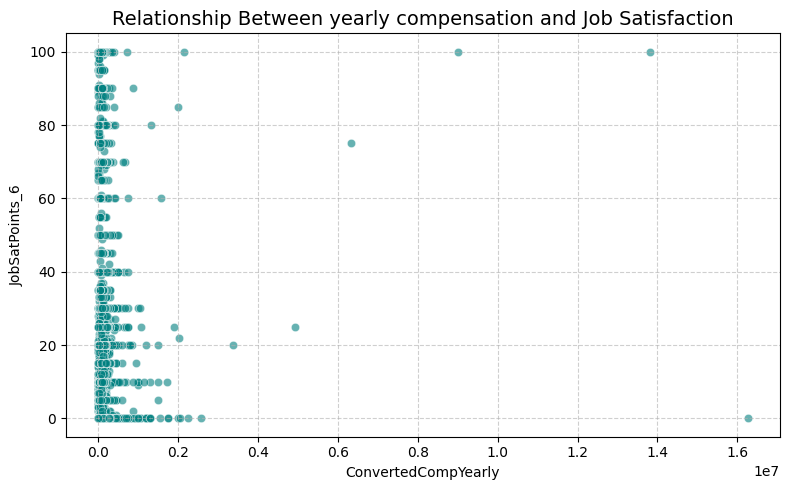

In [ ]:
#Select the columns needed for the plot
corr_df = df[['ConvertedCompYearly', 'JobSatPoints_6']].copy()

# --- Step 4: Visualize relationship ---
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=corr_df,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    alpha=0.6,
    color='teal'
)
plt.title('Relationship Between yearly compensation and Job Satisfaction', fontsize=14)
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

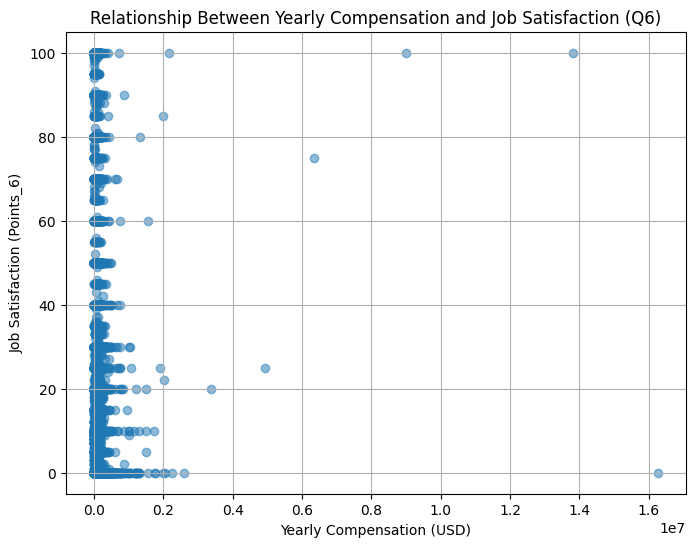

In [ ]:
# Clean and prepare the data for analysis
df_clean = df[['ConvertedCompYearly', 'JobSatPoints_6']].copy()

# Drop missing or invalid data
df_clean = df_clean.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Convert to numeric (in case they are strings)
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')

# Drop NaN values again after conversion
df_clean = df_clean.dropna()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['ConvertedCompYearly'], df_clean['JobSatPoints_6'], alpha=0.5)
plt.title('Relationship Between Yearly Compensation and Job Satisfaction (Q6)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points_6)')
plt.grid(True)
plt.show()


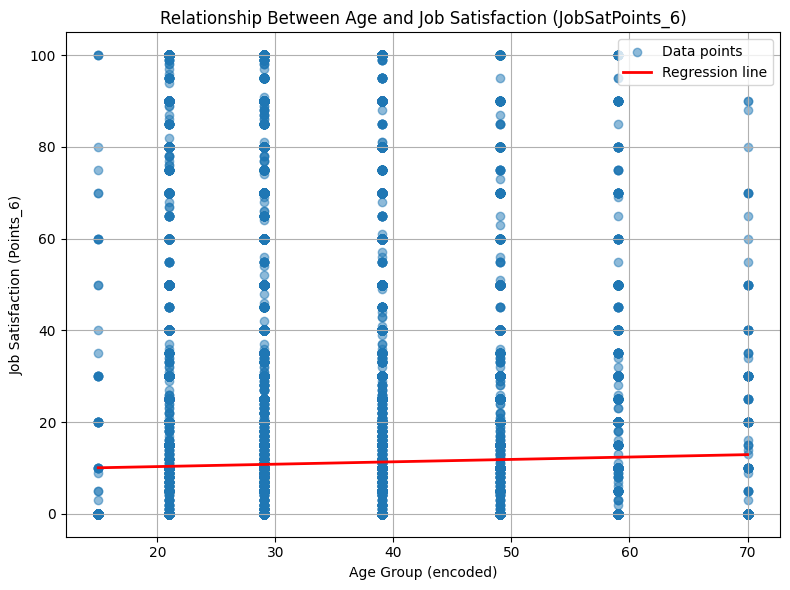

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['AgeNumeric'], df['JobSatPoints_6'], alpha=0.5, label='Data points')

# Regression line
z = np.polyfit(df['AgeNumeric'], df['JobSatPoints_6'], 1)
p = np.poly1d(z)
plt.plot(df['AgeNumeric'], p(df['AgeNumeric']), color='red', linewidth=2, label='Regression line')

# Labels and styling
plt.title('Relationship Between Age and Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age Group (encoded)')
plt.ylabel('Job Satisfaction (Points_6)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

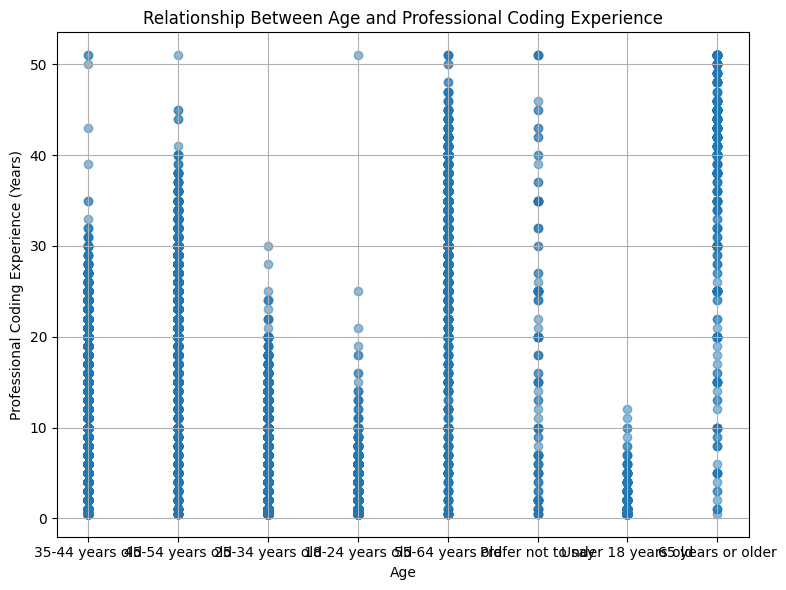

In [ ]:
# Select relevant columns and clean data
df_clean = df[['Age', 'YearsCodePro']].copy()
df_clean = df_clean.dropna(subset=['Age', 'YearsCodePro'])

# Convert possible string values like 'Less than 1 year' or 'More than 50 years' to numeric
def convert_experience(x):
    if isinstance(x, str):
        if "Less than 1" in x:
            return 0.5
        elif "More than 50" in x:
            return 51
        else:
            try:
                return float(x)
            except:
                return None
    return x

df_clean['YearsCodePro'] = df_clean['YearsCodePro'].apply(convert_experience)
df_clean = df_clean.dropna()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Age'], df_clean['YearsCodePro'], alpha=0.5)
plt.title('Relationship Between Age and Professional Coding Experience')
plt.xlabel('Age')
plt.ylabel('Professional Coding Experience (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()

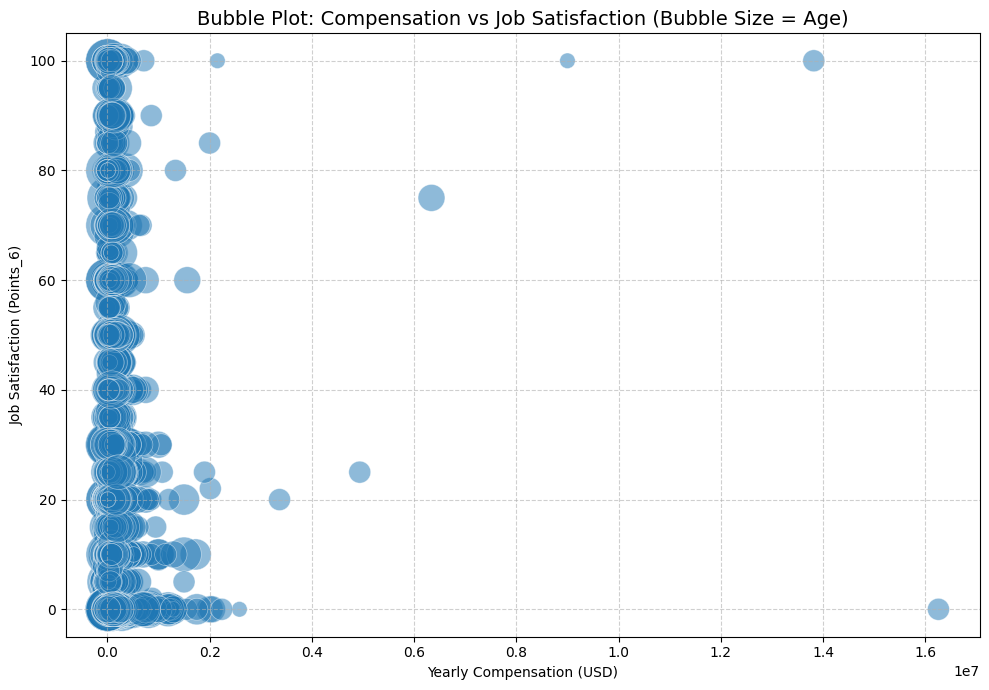

In [ ]:
# Select relevant columns
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].copy()

# Drop missing values
df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Convert numeric columns (in case they are strings)
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')

# Handle age (if categorical, encode)
if df_bubble['Age'].dtype == 'object':
    df_bubble['Age_encoded'] = df_bubble['Age'].astype('category').cat.codes + 1  # +1 to avoid zero-size bubbles
else:
    df_bubble['Age_encoded'] = df_bubble['Age']

# Drop any NaN values created by conversion
df_bubble = df_bubble.dropna()

# Scale bubble sizes for better visualization
sizes = (df_bubble['Age_encoded'] / df_bubble['Age_encoded'].max()) * 1000

# Create bubble plot
plt.figure(figsize=(10, 7))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=sizes,
    alpha=0.5,
    edgecolors='w',
    linewidth=0.5
)

# Add labels and title
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points_6)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

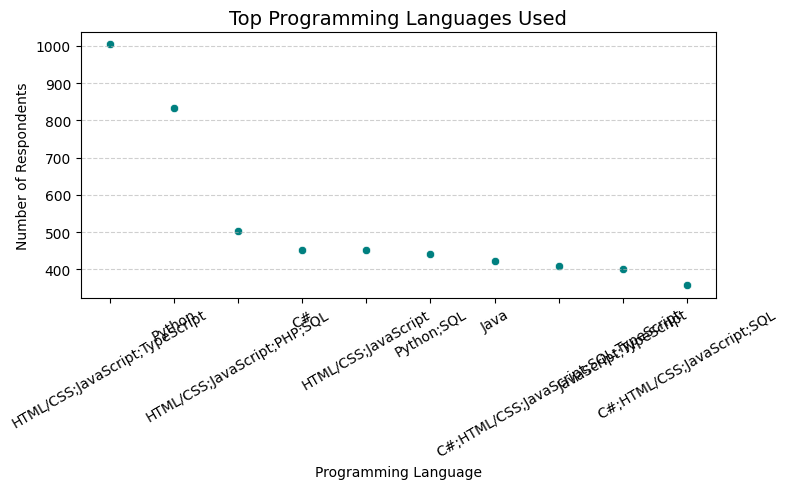

In [ ]:
top_langs = df['LanguageHaveWorkedWith'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.scatterplot(x=top_langs.index, y=top_langs.values, color='teal')

plt.title('Top Programming Languages Used', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the value counts of the 'LanguageHaveWorkedWith' column
top_langs = df['LanguageHaveWorkedWith'].value_counts().head(10)

In [ ]:
top_langs

,count
LanguageHaveWorkedWith,
HTML/CSS;JavaScript;TypeScript,1004
Python,832
HTML/CSS;JavaScript;PHP;SQL,503
C#,453
HTML/CSS;JavaScript,452
Python;SQL,441
Java,424
C#;HTML/CSS;JavaScript;SQL;TypeScript,408
JavaScript;TypeScript,402


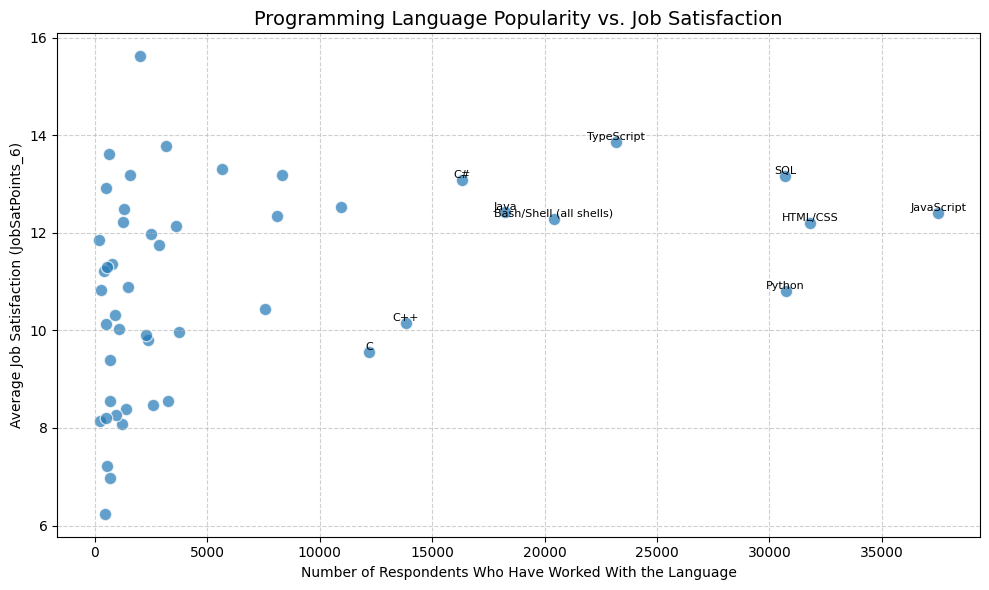

In [ ]:
# Drop rows with missing data
df_lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].copy()
df_lang = df_lang.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Split multiple languages into separate rows
df_lang = df_lang.assign(LanguageHaveWorkedWith=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Clean up language names (trim spaces)
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

# Compute average satisfaction per language
lang_summary = df_lang.groupby('LanguageHaveWorkedWith').agg(
    avg_satisfaction=('JobSatPoints_6', 'mean'),
    count=('LanguageHaveWorkedWith', 'count')
).reset_index()

# Filter to languages with a reasonable number of respondents (optional)
lang_summary = lang_summary[lang_summary['count'] > 20]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    lang_summary['count'],
    lang_summary['avg_satisfaction'],
    alpha=0.7,
    s=80,
    edgecolors='w'
)

# Add labels and formatting
plt.title('Programming Language Popularity vs. Job Satisfaction', fontsize=14)
plt.xlabel('Number of Respondents Who Have Worked With the Language')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate top few languages for clarity
for i, row in lang_summary.nlargest(10, 'count').iterrows():
    plt.text(row['count'], row['avg_satisfaction'], row['LanguageHaveWorkedWith'],
             fontsize=8, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
lang_summary

,LanguageHaveWorkedWith,avg_satisfaction,count
0,Ada,7.215867,542
1,Apex,10.127490,502
2,Assembly,8.551757,3233
3,Bash/Shell (all shells),12.286489,20417
4,C,9.553059,12186
5,C#,13.088991,16320
6,C++,10.147975,13830
7,Clojure,11.365672,737
8,Cobol,11.225182,413
9,Crystal,10.822134,253


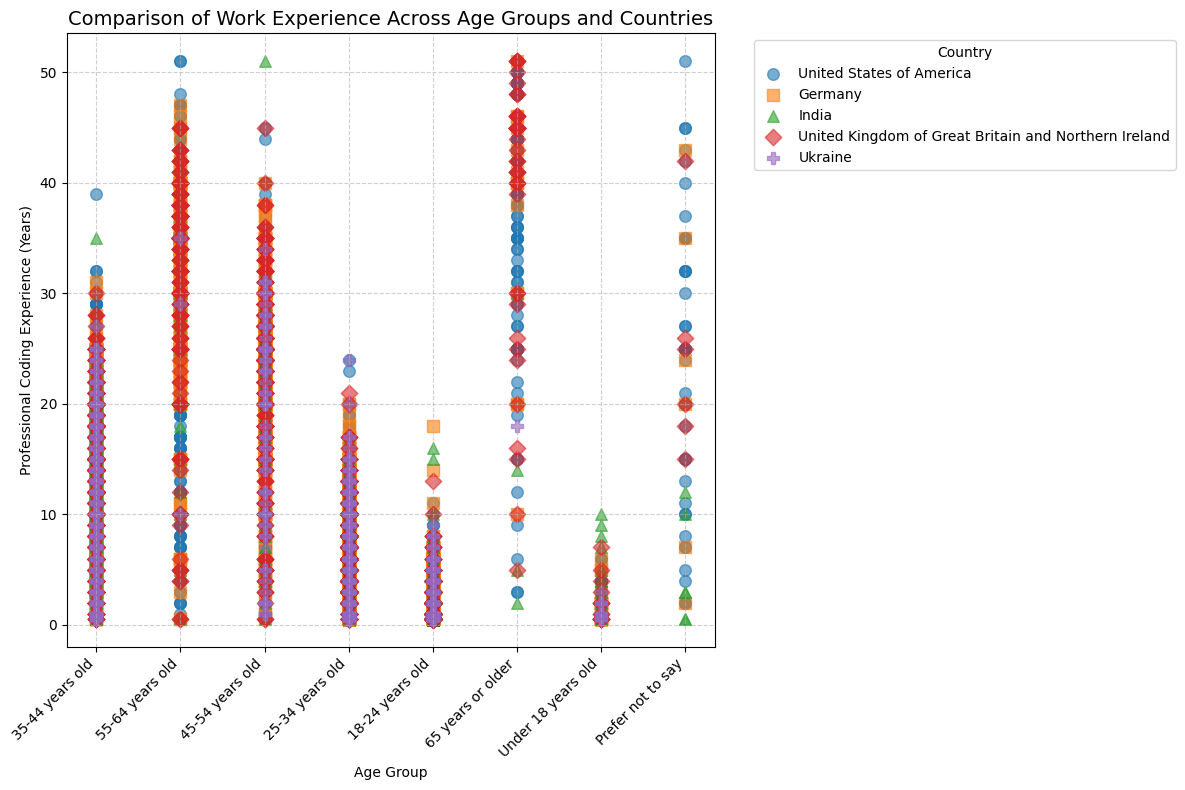

In [ ]:
# Select relevant columns
df_exp = df[['YearsCodePro', 'Age', 'Country']].copy()

# Drop missing values
df_exp = df_exp.dropna(subset=['YearsCodePro', 'Age', 'Country'])

# Convert YearsCodePro to numeric (handle strings like "Less than 1 year", "More than 50 years")
def convert_experience(x):
    if isinstance(x, str):
        if "Less than 1" in x:
            return 0.5
        elif "More than 50" in x:
            return 51
        else:
            try:
                return float(x)
            except:
                return np.nan
    return x

df_exp['YearsCodePro'] = df_exp['YearsCodePro'].apply(convert_experience)
df_exp = df_exp.dropna()

# Choose a subset of countries for clearer visualization (optional)
top_countries = df_exp['Country'].value_counts().nlargest(5).index
df_exp = df_exp[df_exp['Country'].isin(top_countries)]

# Assign colors and markers
colors = plt.cm.tab10.colors
markers = ['o', 's', '^', 'D', 'P', 'X', '*']

# Create scatter plot
plt.figure(figsize=(12, 8))

for i, country in enumerate(top_countries):
    subset = df_exp[df_exp['Country'] == country]
    marker = markers[i % len(markers)]
    plt.scatter(
        subset['Age'],
        subset['YearsCodePro'],
        label=country,
        alpha=0.6,
        s=70,
        marker=marker,
        color=colors[i % len(colors)]
    )

# Labels and title
plt.title('Comparison of Work Experience Across Age Groups and Countries', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Professional Coding Experience (Years)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

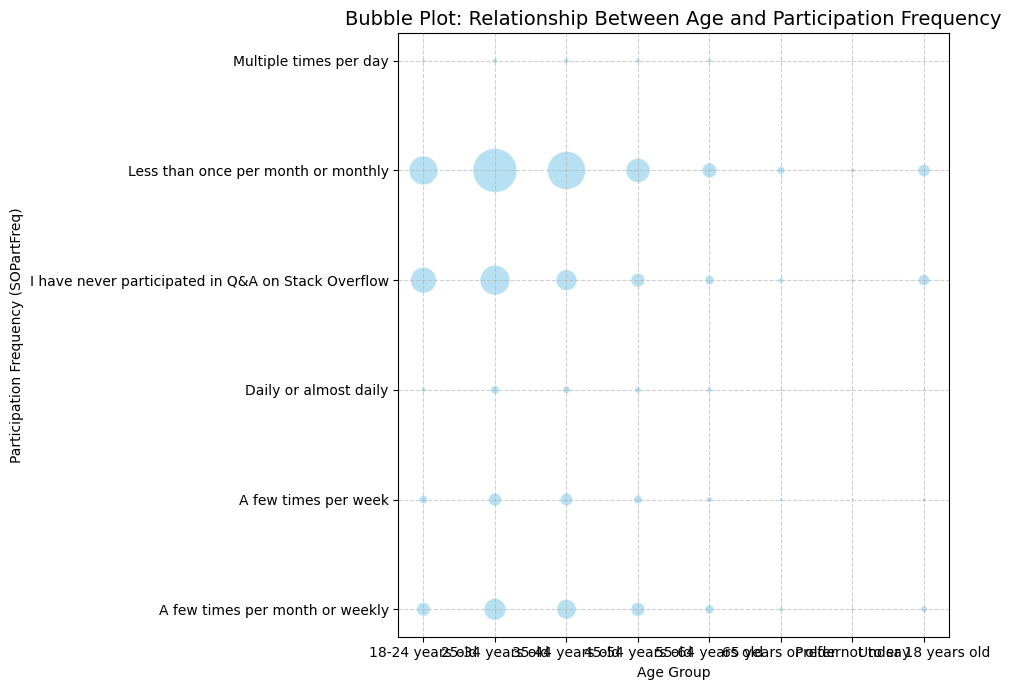

In [ ]:
# Select relevant columns
df_bubble = df[['Age', 'SOPartFreq']].copy()

# Drop rows with missing data
df_bubble = df_bubble.dropna(subset=['Age', 'SOPartFreq'])

# Group by Age and Participation Frequency, count respondents
bubble_data = (
    df_bubble.groupby(['Age', 'SOPartFreq'])
    .size()
    .reset_index(name='RespondentCount')
)

# Encode SOPartFreq as numeric positions for plotting
bubble_data['SOPartFreq_encoded'] = bubble_data['SOPartFreq'].astype('category').cat.codes

# Scale bubble sizes
bubble_data['size'] = (bubble_data['RespondentCount'] / bubble_data['RespondentCount'].max()) * 1000

# Create bubble plot
plt.figure(figsize=(10, 7))
plt.scatter(
    bubble_data['Age'],
    bubble_data['SOPartFreq_encoded'],
    s=bubble_data['size'],
    alpha=0.6,
    c='skyblue',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and formatting
plt.title('Bubble Plot: Relationship Between Age and Participation Frequency', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Participation Frequency (SOPartFreq)')
plt.yticks(
    ticks=range(len(bubble_data['SOPartFreq'].astype('category').cat.categories)),
    labels=bubble_data['SOPartFreq'].astype('category').cat.categories
)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

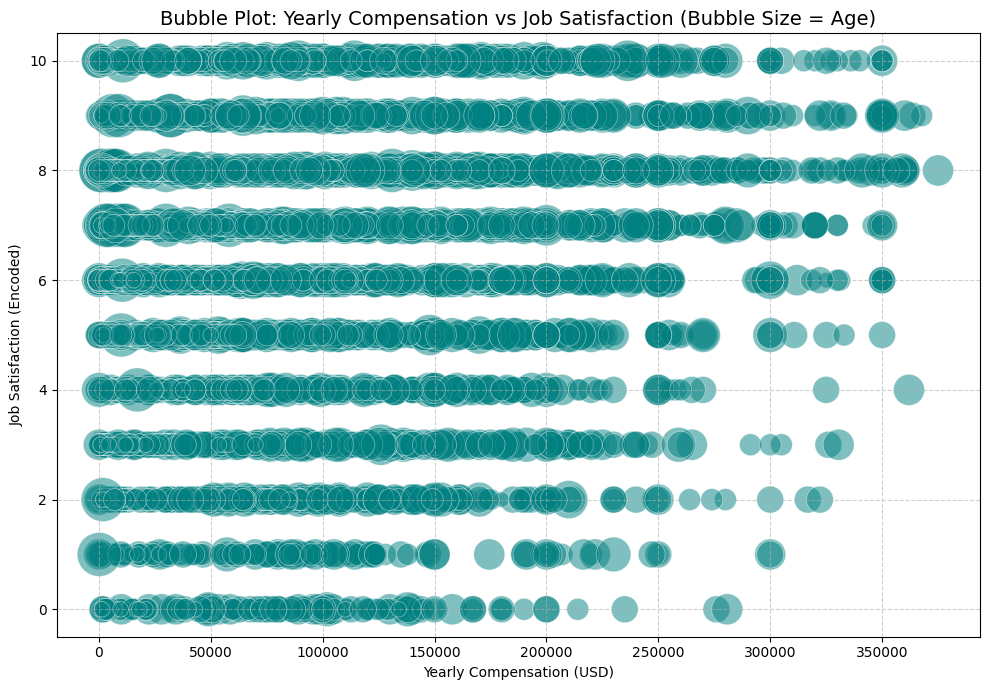

In [ ]:
# Select relevant columns
df_bubble = df[['ConvertedCompYearly', 'JobSat', 'Age']].copy()

# Drop missing values
df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Convert numeric columns where needed
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly'])

# Handle categorical satisfaction if necessary
if df_bubble['JobSat'].dtype == 'object':
    df_bubble['JobSat_encoded'] = df_bubble['JobSat'].astype('category').cat.codes
else:
    df_bubble['JobSat_encoded'] = df_bubble['JobSat']

# Encode age if categorical
if df_bubble['Age'].dtype == 'object':
    df_bubble['Age_encoded'] = df_bubble['Age'].astype('category').cat.codes + 1
else:
    df_bubble['Age_encoded'] = df_bubble['Age']

# Limit extreme outliers for readability
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < df_bubble['ConvertedCompYearly'].quantile(0.99)]

# Scale bubble size for better visibility
sizes = (df_bubble['Age_encoded'] / df_bubble['Age_encoded'].max()) * 1000

# Create bubble plot
plt.figure(figsize=(10, 7))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSat_encoded'],
    s=sizes,
    alpha=0.5,
    c='teal',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and formatting
plt.title('Bubble Plot: Yearly Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Encoded)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

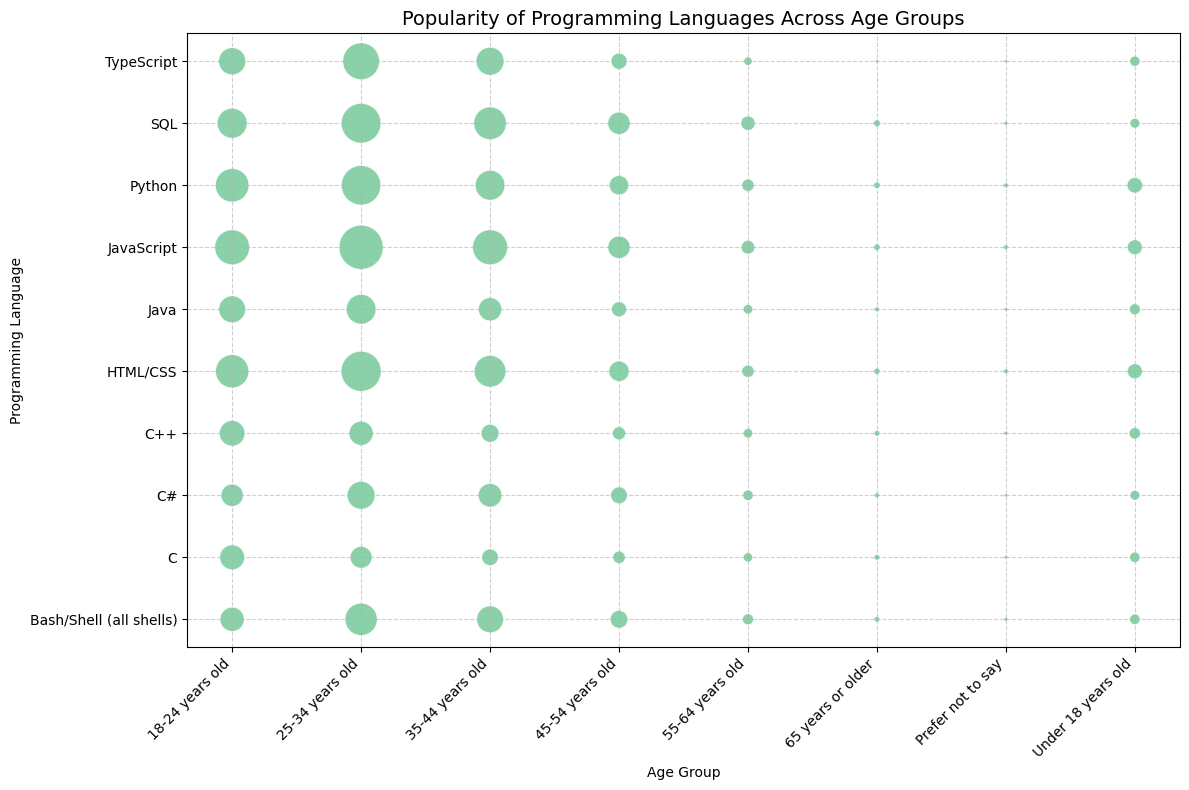

In [ ]:
# Select relevant columns
df_lang_age = df[['Age', 'LanguageHaveWorkedWith']].copy()

# Drop missing values
df_lang_age = df_lang_age.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Split multiple languages into separate rows
df_lang_age = df_lang_age.assign(LanguageHaveWorkedWith=df_lang_age['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Clean language names
df_lang_age['LanguageHaveWorkedWith'] = df_lang_age['LanguageHaveWorkedWith'].str.strip()

# Group by Age and Language, count frequency
bubble_data = (
    df_lang_age.groupby(['Age', 'LanguageHaveWorkedWith'])
    .size()
    .reset_index(name='Count')
)

# Limit to the top few languages for clarity (optional)
top_languages = bubble_data.groupby('LanguageHaveWorkedWith')['Count'].sum().nlargest(10).index
bubble_data = bubble_data[bubble_data['LanguageHaveWorkedWith'].isin(top_languages)]

# Scale bubble sizes
bubble_data['size'] = (bubble_data['Count'] / bubble_data['Count'].max()) * 1000

# Create bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(
    bubble_data['Age'],
    bubble_data['LanguageHaveWorkedWith'],
    s=bubble_data['size'],
    alpha=0.6,
    c='mediumseagreen',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and formatting
plt.title('Popularity of Programming Languages Across Age Groups', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

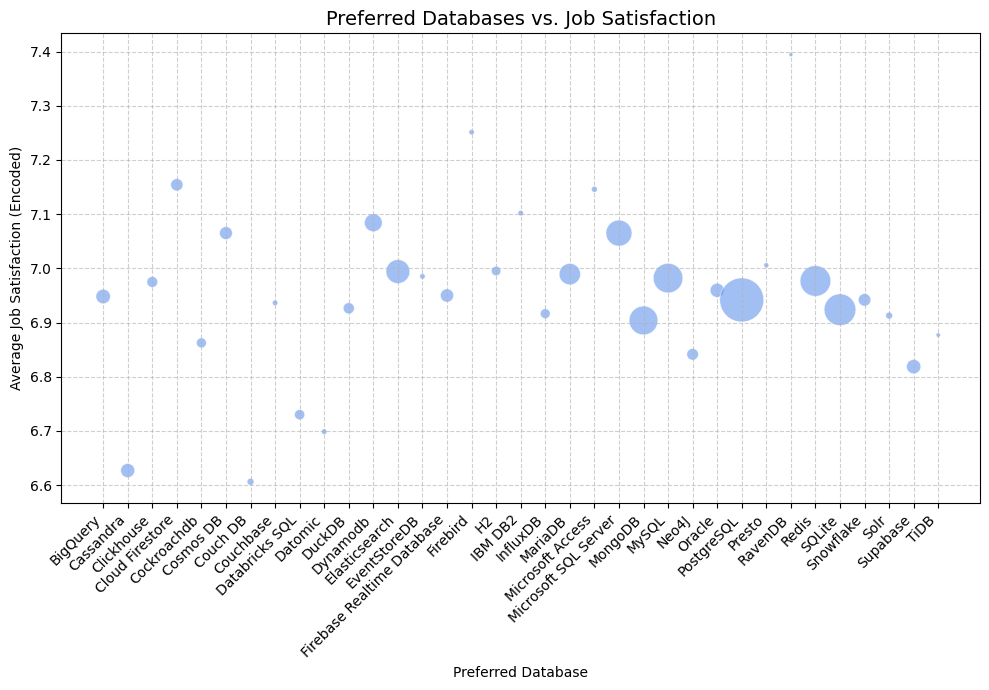

In [ ]:
# Select relevant columns
df_db = df[['DatabaseWantToWorkWith', 'JobSat']].copy()

# Drop missing values
df_db = df_db.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Split multiple databases into separate rows
df_db = df_db.assign(DatabaseWantToWorkWith=df_db['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Clean database names
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.strip()

# Handle categorical job satisfaction
if df_db['JobSat'].dtype == 'object':
    df_db['JobSat_encoded'] = df_db['JobSat'].astype('category').cat.codes
else:
    df_db['JobSat_encoded'] = df_db['JobSat']

# Group by preferred database and compute metrics
bubble_data = (
    df_db.groupby('DatabaseWantToWorkWith')
    .agg(
        avg_satisfaction=('JobSat_encoded', 'mean'),
        count=('DatabaseWantToWorkWith', 'count')
    )
    .reset_index()
)

# Filter to top databases for clarity (optional)
bubble_data = bubble_data[bubble_data['count'] > 20]

# Scale bubble size
bubble_data['size'] = (bubble_data['count'] / bubble_data['count'].max()) * 1000

# Create bubble plot
plt.figure(figsize=(10, 7))
plt.scatter(
    bubble_data['DatabaseWantToWorkWith'],
    bubble_data['avg_satisfaction'],
    s=bubble_data['size'],
    alpha=0.6,
    c='cornflowerblue',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and formatting
plt.title('Preferred Databases vs. Job Satisfaction', fontsize=14)
plt.xlabel('Preferred Database')
plt.ylabel('Average Job Satisfaction (Encoded)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

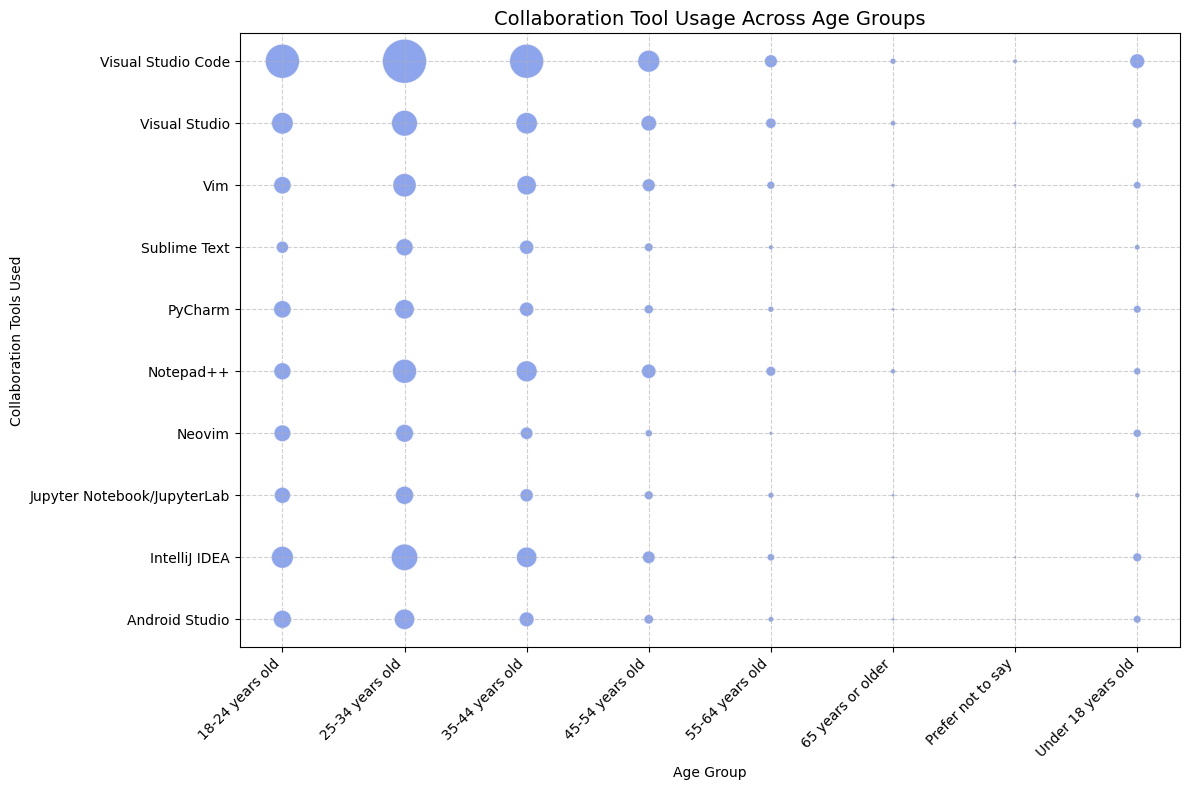

In [ ]:
# Select relevant columns
df_tools = df[['Age', 'NEWCollabToolsHaveWorkedWith']].copy()

# Drop missing values
df_tools = df_tools.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'])

# Split multiple tools into separate rows
df_tools = df_tools.assign(NEWCollabToolsHaveWorkedWith=df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')

# Clean tool names
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.strip()

# Group by Age and Collaboration Tool, count frequency
bubble_data = (
    df_tools.groupby(['Age', 'NEWCollabToolsHaveWorkedWith'])
    .size()
    .reset_index(name='Count')
)

# Optionally limit to top collaboration tools for readability
top_tools = bubble_data.groupby('NEWCollabToolsHaveWorkedWith')['Count'].sum().nlargest(10).index
bubble_data = bubble_data[bubble_data['NEWCollabToolsHaveWorkedWith'].isin(top_tools)]

# Scale bubble size
bubble_data['size'] = (bubble_data['Count'] / bubble_data['Count'].max()) * 1000

# Create bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(
    bubble_data['Age'],
    bubble_data['NEWCollabToolsHaveWorkedWith'],
    s=bubble_data['size'],
    alpha=0.6,
    c='royalblue',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and formatting
plt.title('Collaboration Tool Usage Across Age Groups', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tools Used')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

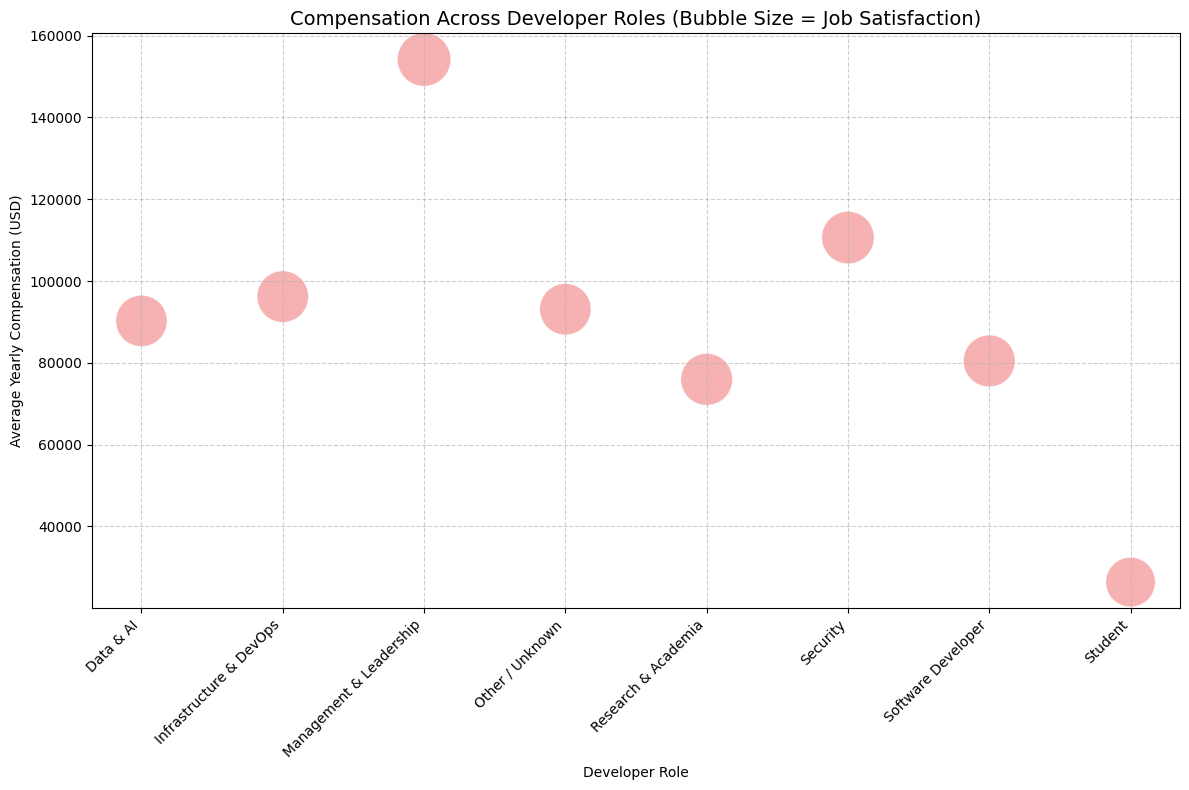

In [ ]:
# Select relevant columns
df_roles = df[['DevType', 'ConvertedCompYearly', 'JobSat']].copy()

# Drop missing values
df_roles = df_roles.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])

# Split multiple roles (since many respondents select more than one)
df_roles = df_roles.assign(DevType=df_roles['DevType'].str.split(';')).explode('DevType')

# Clean up role names
df_roles['DevType'] = df_roles['DevType'].str.strip()

# Convert compensation to numeric
df_roles['ConvertedCompYearly'] = pd.to_numeric(df_roles['ConvertedCompYearly'], errors='coerce')

# Encode Job Satisfaction (categorical → numeric)
if df_roles['JobSat'].dtype == 'object':
    df_roles['JobSat_encoded'] = df_roles['JobSat'].astype('category').cat.codes
else:
    df_roles['JobSat_encoded'] = df_roles['JobSat']

# Group by developer role
bubble_data = (
    df_roles.groupby('DevType')
    .agg(
        avg_comp=('ConvertedCompYearly', 'mean'),
        avg_satisfaction=('JobSat_encoded', 'mean'),
        count=('DevType', 'count')
    )
    .reset_index()
)

# Scale bubble size (based on satisfaction)
bubble_data['size'] = (bubble_data['avg_satisfaction'] / bubble_data['avg_satisfaction'].max()) * 1500

# Filter out extreme compensation values and rare roles for readability
bubble_data = bubble_data[bubble_data['avg_comp'] < bubble_data['avg_comp'].quantile(0.99)]
bubble_data = bubble_data[bubble_data['count'] > 20]

# Create bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(
    bubble_data['DevType'],
    bubble_data['avg_comp'],
    s=bubble_data['size'],
    alpha=0.6,
    c='lightcoral',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and styling
plt.title('Compensation Across Developer Roles (Bubble Size = Job Satisfaction)', fontsize=14)
plt.xlabel('Developer Role')
plt.ylabel('Average Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

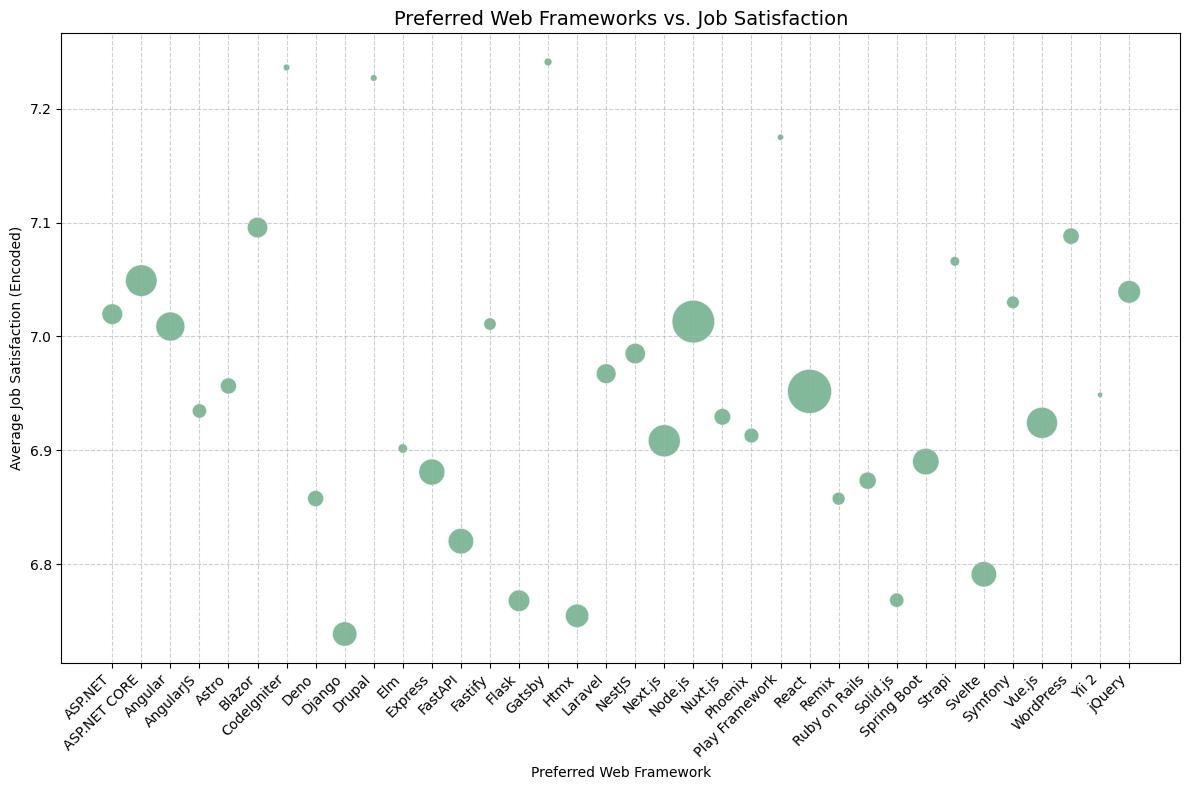

In [ ]:

# Select relevant columns
df_web = df[['WebframeWantToWorkWith', 'JobSat']].copy()

# Drop missing values
df_web = df_web.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Split multiple frameworks into separate rows
df_web = df_web.assign(WebframeWantToWorkWith=df_web['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Clean framework names
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.strip()

# Encode Job Satisfaction (convert categorical → numeric)
if df_web['JobSat'].dtype == 'object':
    df_web['JobSat_encoded'] = df_web['JobSat'].astype('category').cat.codes
else:
    df_web['JobSat_encoded'] = df_web['JobSat']

# Group by preferred web framework
bubble_data = (
    df_web.groupby('WebframeWantToWorkWith')
    .agg(
        avg_satisfaction=('JobSat_encoded', 'mean'),
        count=('WebframeWantToWorkWith', 'count')
    )
    .reset_index()
)

# Filter top frameworks for clarity (optional)
bubble_data = bubble_data[bubble_data['count'] > 20]

# Scale bubble size based on number of respondents
bubble_data['size'] = (bubble_data['count'] / bubble_data['count'].max()) * 1000

# Create bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(
    bubble_data['WebframeWantToWorkWith'],
    bubble_data['avg_satisfaction'],
    s=bubble_data['size'],
    alpha=0.6,
    c='seagreen',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and formatting
plt.title('Preferred Web Frameworks vs. Job Satisfaction', fontsize=14)
plt.xlabel('Preferred Web Framework')
plt.ylabel('Average Job Satisfaction (Encoded)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

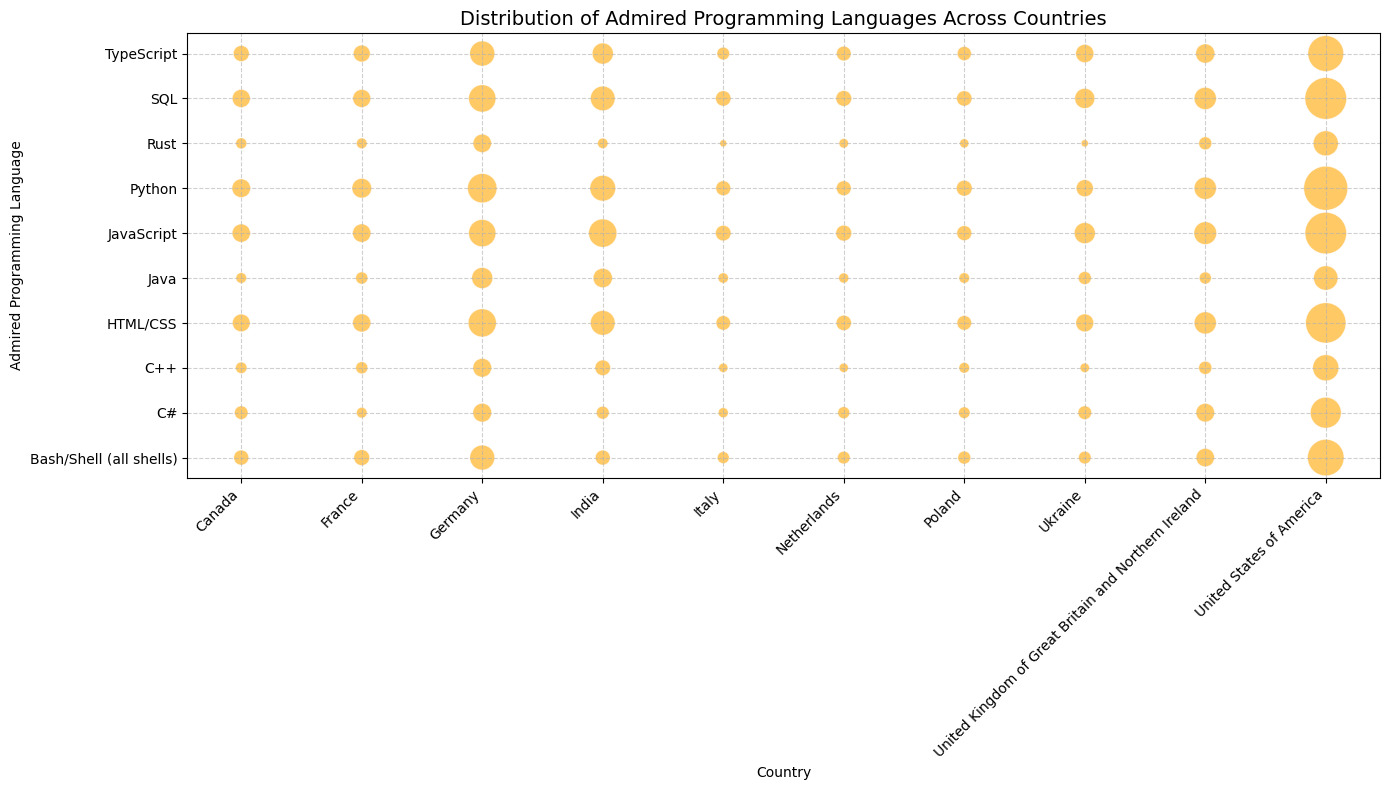

In [ ]:
# Select relevant columns
df_lang = df[['Country', 'LanguageAdmired']].copy()

# Drop missing values
df_lang = df_lang.dropna(subset=['Country', 'LanguageAdmired'])

# Split multiple admired languages into separate rows
df_lang = df_lang.assign(LanguageAdmired=df_lang['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Clean up language names
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.strip()

# Group by Country and LanguageAdmired to count frequency
bubble_data = (
    df_lang.groupby(['Country', 'LanguageAdmired'])
    .size()
    .reset_index(name='Count')
)

# Focus on top languages for readability (optional)
top_languages = bubble_data.groupby('LanguageAdmired')['Count'].sum().nlargest(10).index
bubble_data = bubble_data[bubble_data['LanguageAdmired'].isin(top_languages)]

# Focus on top countries (optional)
top_countries = bubble_data.groupby('Country')['Count'].sum().nlargest(10).index
bubble_data = bubble_data[bubble_data['Country'].isin(top_countries)]

# Scale bubble sizes
bubble_data['size'] = (bubble_data['Count'] / bubble_data['Count'].max()) * 1000

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    bubble_data['Country'],
    bubble_data['LanguageAdmired'],
    s=bubble_data['size'],
    alpha=0.6,
    c='orange',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and formatting
plt.title('Distribution of Admired Programming Languages Across Countries', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Admired Programming Language')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Select relevant column
df_db = df[['DatabaseWantToWorkWith']].copy()

# Drop missing values
df_db = df_db.dropna(subset=['DatabaseWantToWorkWith'])

# Split multiple selections into separate rows
df_db = df_db.assign(DatabaseWantToWorkWith=df_db['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Clean database names
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.strip()

# Count occurrences of each database
db_counts = df_db['DatabaseWantToWorkWith'].value_counts().head(5)

In [ ]:
db_counts

,count
DatabaseWantToWorkWith,
PostgreSQL,24012
SQLite,13494
MySQL,12273
MongoDB,10984
Redis,10850


In [ ]:
df_db

,DatabaseWantToWorkWith
1,PostgreSQL
2,Firebase Realtime Database
3,MongoDB
3,MySQL
3,PostgreSQL
...,...
65454,Oracle
65454,SQLite
65456,Microsoft SQL Server
65456,MySQL


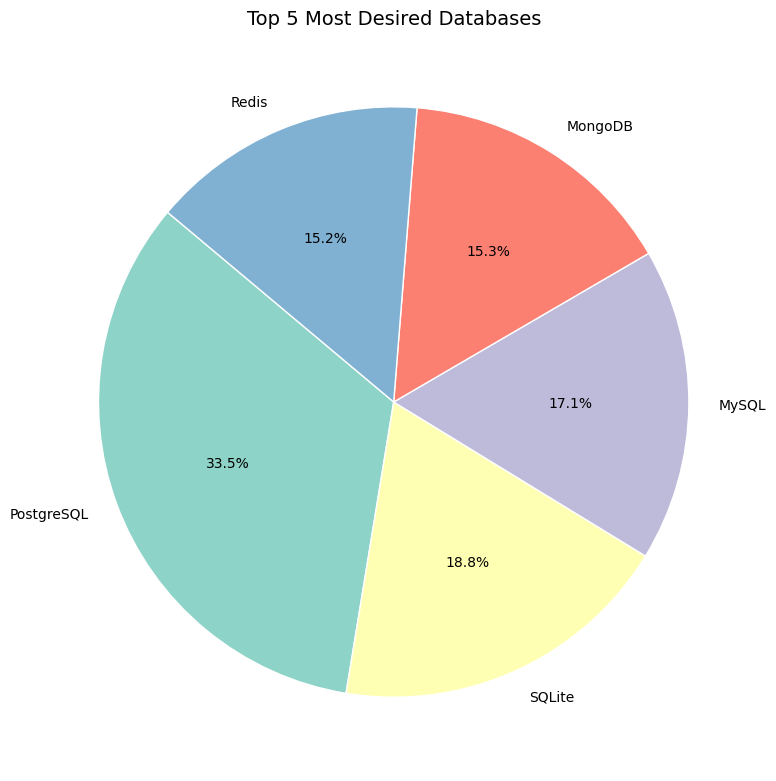

In [ ]:
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    db_counts,
    labels=db_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Set3.colors  # pastel palette
)

# Add title
plt.title('Top 5 Most Desired Databases', fontsize=14)
plt.tight_layout()
plt.show()

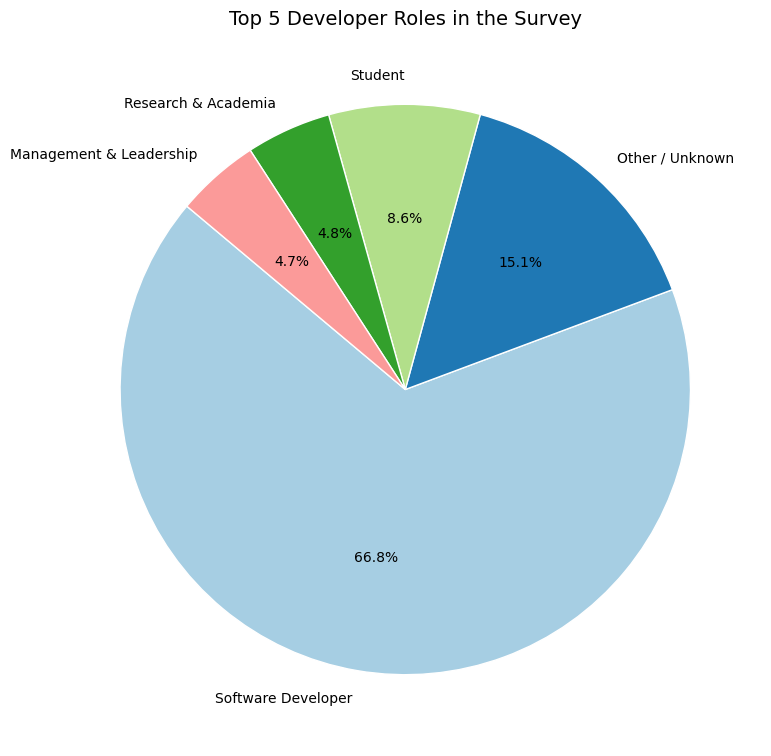

In [ ]:
# Select relevant column
df_roles = df[['DevType']].copy()

# Drop missing values
df_roles = df_roles.dropna(subset=['DevType'])

# Split multiple roles into separate rows
df_roles = df_roles.assign(DevType=df_roles['DevType'].str.split(';')).explode('DevType')

# Clean up role names
df_roles['DevType'] = df_roles['DevType'].str.strip()

# Count each role’s frequency
role_counts = df_roles['DevType'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    role_counts,
    labels=role_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Paired.colors  # colorful palette
)

# Add title
plt.title('Top 5 Developer Roles in the Survey', fontsize=14)
plt.tight_layout()
plt.show()

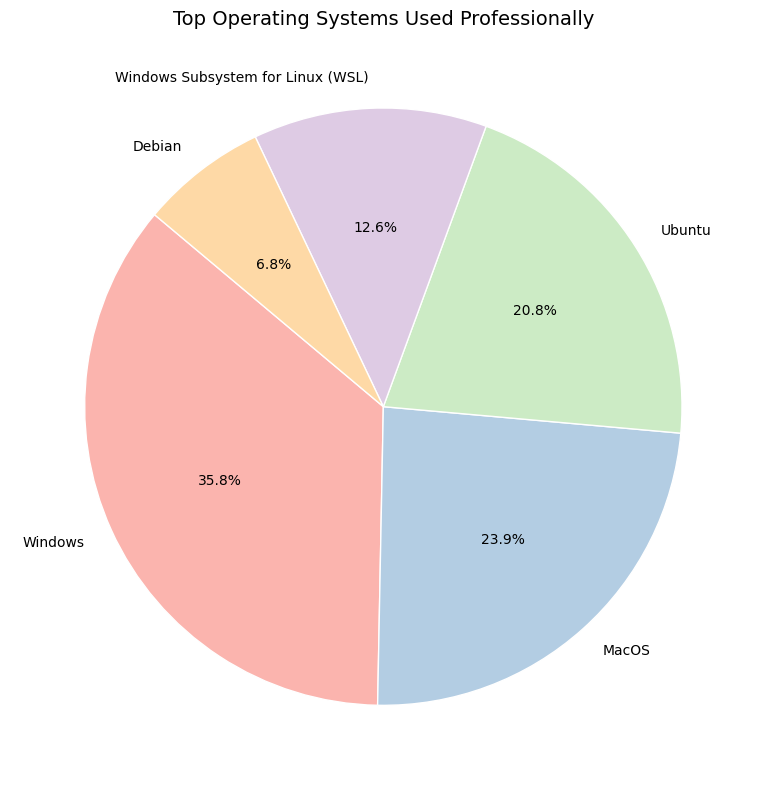

In [ ]:
# Select relevant column
df_os = df[['OpSysProfessional use']].copy()

# Drop missing values
df_os = df_os.dropna(subset=['OpSysProfessional use'])

# Split multiple operating systems into separate rows
df_os = df_os.assign(**{'OpSysProfessional use': df_os['OpSysProfessional use'].str.split(';')}).explode('OpSysProfessional use')

# Clean up OS names
df_os['OpSysProfessional use'] = df_os['OpSysProfessional use'].str.strip()

# Count occurrences
os_counts = df_os['OpSysProfessional use'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    os_counts,
    labels=os_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Pastel1.colors  # soft pastel palette
)

# Add title
plt.title('Top Operating Systems Used Professionally', fontsize=14)
plt.tight_layout()
plt.show()

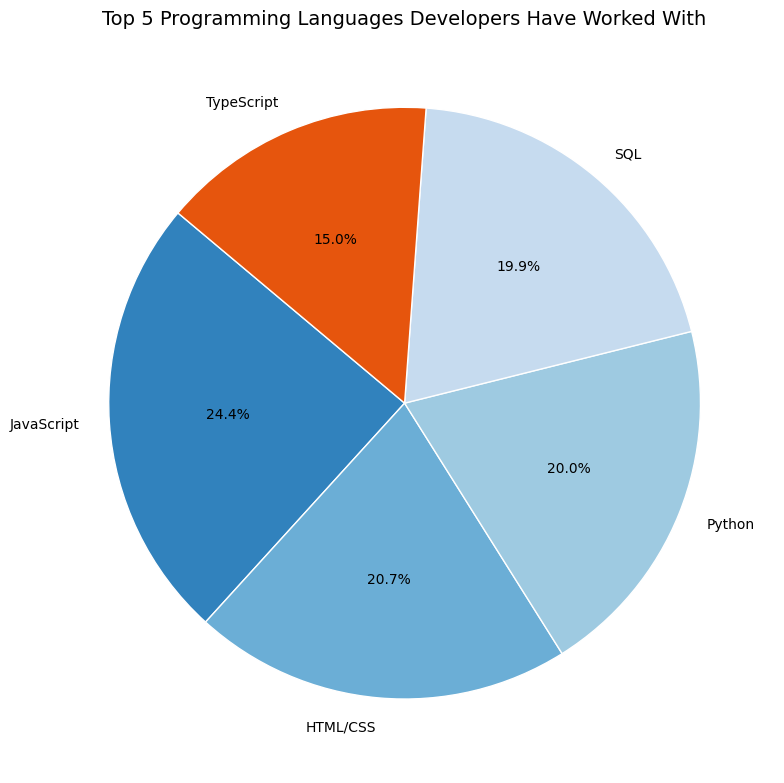

In [ ]:
# Select relevant column
df_lang = df[['LanguageHaveWorkedWith']].copy()

# Drop missing values
df_lang = df_lang.dropna(subset=['LanguageHaveWorkedWith'])

# Split multiple languages into separate rows
df_lang = df_lang.assign(LanguageHaveWorkedWith=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Clean up language names
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

# Count each language’s frequency
lang_counts = df_lang['LanguageHaveWorkedWith'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    lang_counts,
    labels=lang_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.tab20c.colors  # modern color palette
)

# Add title
plt.title('Top 5 Programming Languages Developers Have Worked With', fontsize=14)
plt.tight_layout()
plt.show()

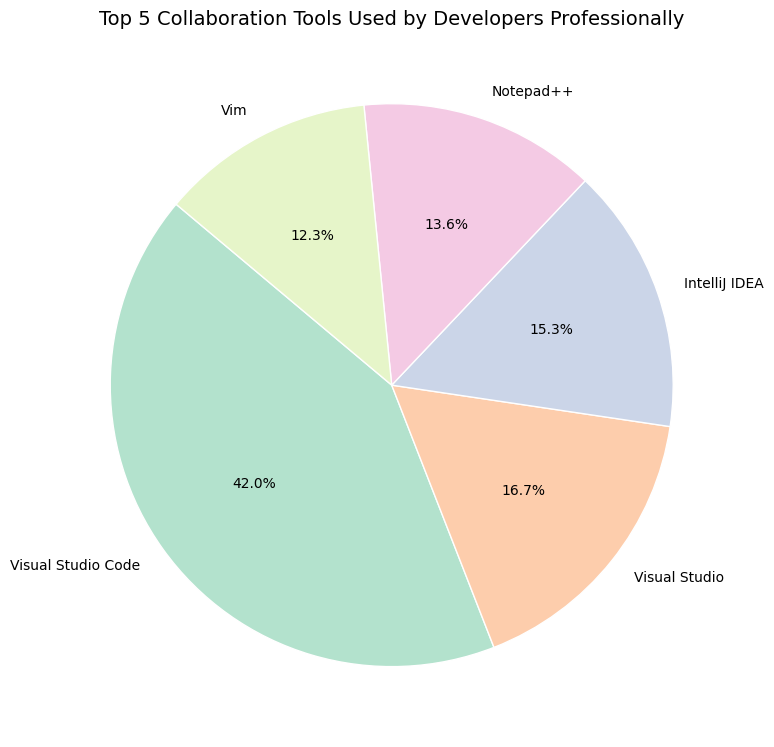

In [ ]:
# Select relevant column
df_tools = df[['NEWCollabToolsHaveWorkedWith']].copy()

# Drop missing values
df_tools = df_tools.dropna(subset=['NEWCollabToolsHaveWorkedWith'])

# Split multiple tools into separate rows
df_tools = df_tools.assign(NEWCollabToolsHaveWorkedWith=df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')

# Clean up tool names
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.strip()

# Count occurrences of each collaboration tool
tool_counts = df_tools['NEWCollabToolsHaveWorkedWith'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    tool_counts,
    labels=tool_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Pastel2.colors  # soft, readable colors
)

# Add title
plt.title('Top 5 Collaboration Tools Used by Developers Professionally', fontsize=14)
plt.tight_layout()
plt.show()

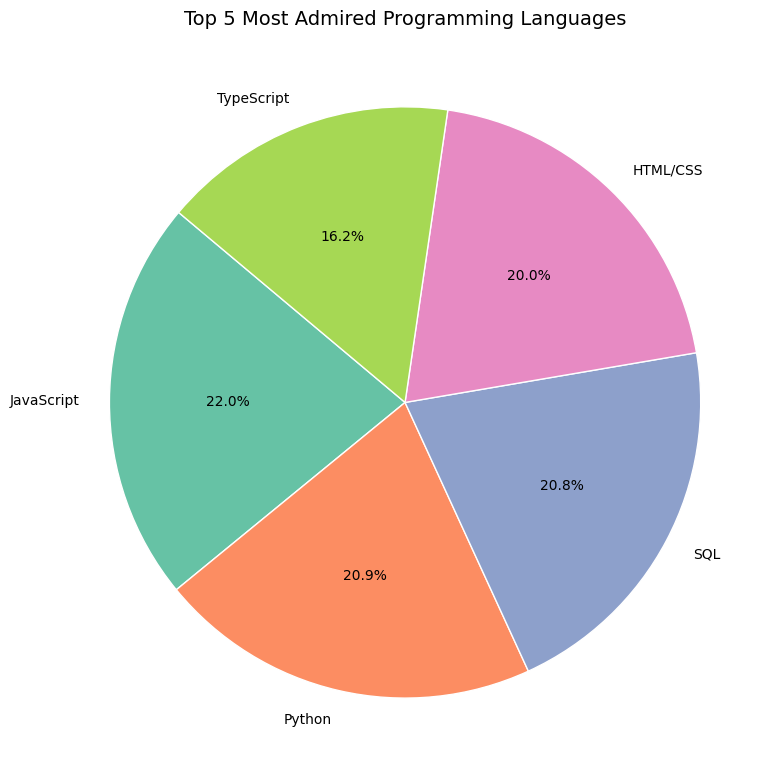

In [ ]:
# Select relevant column
df_admire = df[['LanguageAdmired']].copy()

# Drop missing values
df_admire = df_admire.dropna(subset=['LanguageAdmired'])

# Split multiple admired languages into separate rows
df_admire = df_admire.assign(LanguageAdmired=df_admire['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Clean up language names
df_admire['LanguageAdmired'] = df_admire['LanguageAdmired'].str.strip()

# Count occurrences and select top 5 admired languages
admired_counts = df_admire['LanguageAdmired'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    admired_counts,
    labels=admired_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Set2.colors  # soft, distinct colors
)

# Add title
plt.title('Top 5 Most Admired Programming Languages', fontsize=14)
plt.tight_layout()
plt.show()

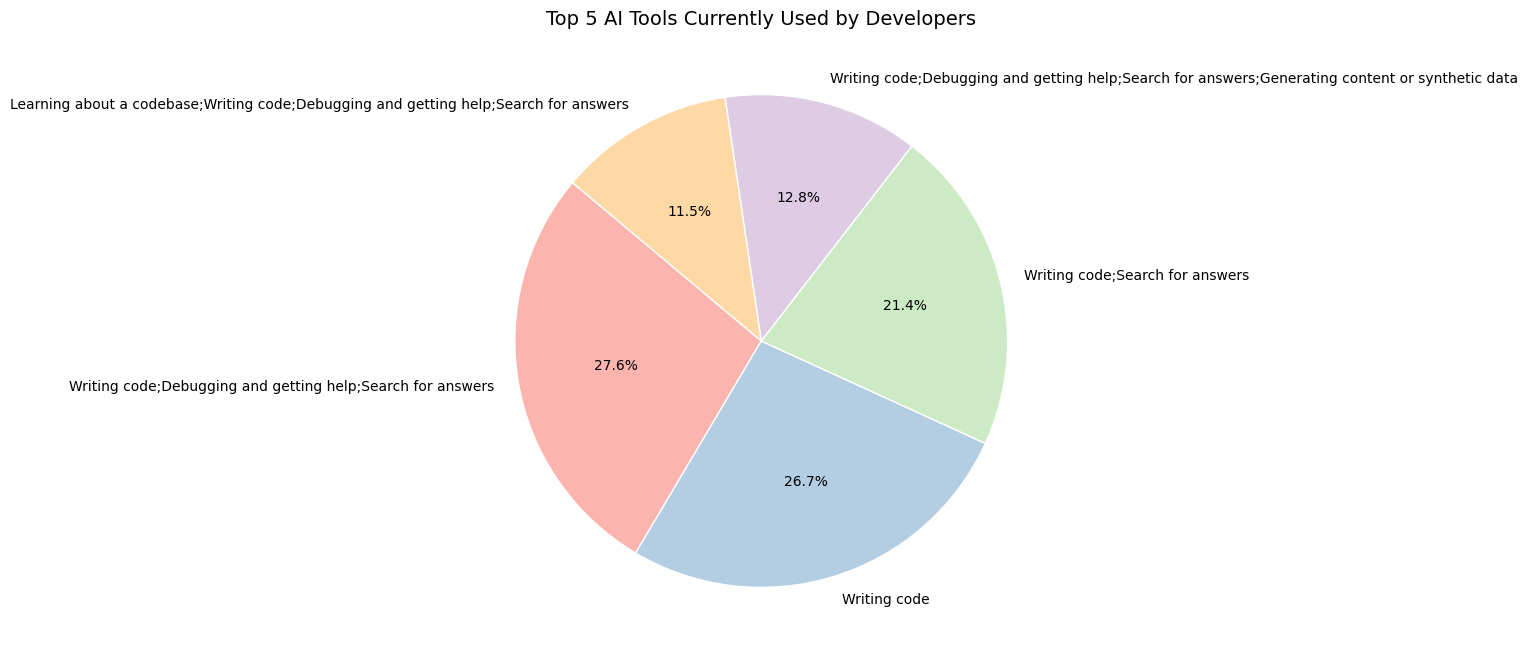

In [ ]:
# Select relevant column
df_ai = df[['AIToolCurrently Using']].copy()

# Drop missing values
df_ai = df_ai.dropna(subset=['AIToolCurrently Using'])

# Split multiple AI tools into separate rows
df_ai = df_ai.assign(AIToolCurrentlyUsing=df_ai['AIToolCurrently Using'].str.split(';')).explode('AIToolCurrently Using')

# Clean up tool names
df_ai['AIToolCurrently Using'] = df_ai['AIToolCurrently Using'].str.strip()

# Count occurrences and select top 5 AI tools
ai_counts = df_ai['AIToolCurrently Using'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    ai_counts,
    labels=ai_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Pastel1.colors  # soft palette for readability
)

# Add title
plt.title('Top 5 AI Tools Currently Used by Developers', fontsize=14)
plt.tight_layout()
plt.show()

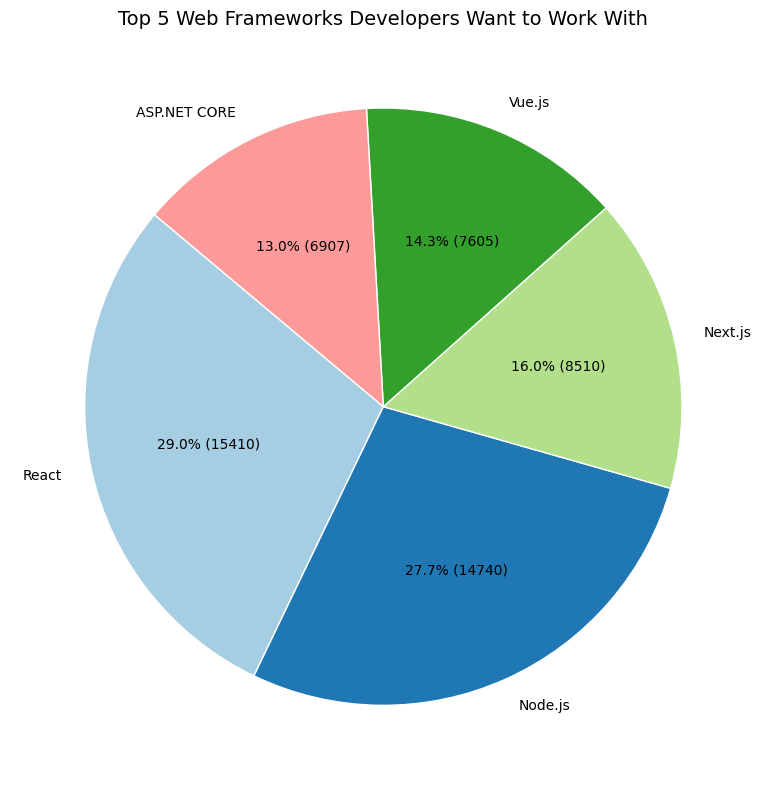

In [ ]:
# Select relevant column
df_web = df[['WebframeWantToWorkWith']].copy()

# Drop missing values
df_web = df_web.dropna(subset=['WebframeWantToWorkWith'])

# Split multiple frameworks into separate rows
df_web = df_web.assign(WebframeWantToWorkWith=df_web['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Clean up framework names
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.strip()

# Count occurrences and get top 5 frameworks
web_counts = df_web['WebframeWantToWorkWith'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    web_counts,
    labels=web_counts.index,
    autopct=lambda pct: f"{pct:.1f}% ({int(pct/100*web_counts.sum())})",  # show % and count
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Paired.colors  # distinct, professional color palette
)

# Add title
plt.title('Top 5 Web Frameworks Developers Want to Work With', fontsize=14)
plt.tight_layout()
plt.show()

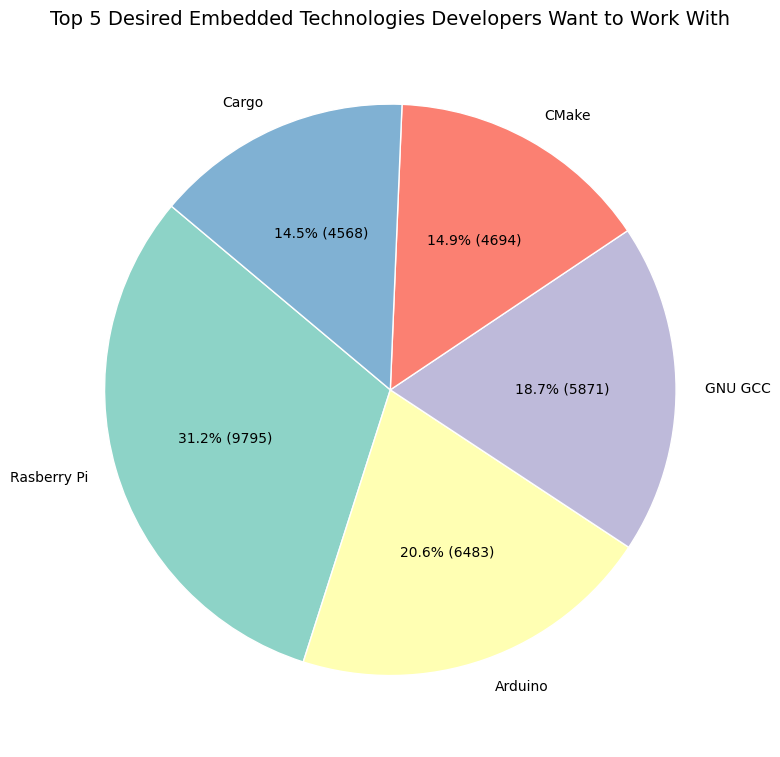

In [ ]:
# Select relevant column
df_embedded = df[['EmbeddedWantToWorkWith']].copy()

# Drop missing values
df_embedded = df_embedded.dropna(subset=['EmbeddedWantToWorkWith'])

# Split multiple selections into separate rows
df_embedded = df_embedded.assign(EmbeddedWantToWorkWith=df_embedded['EmbeddedWantToWorkWith'].str.split(';')).explode('EmbeddedWantToWorkWith')

# Clean up names
df_embedded['EmbeddedWantToWorkWith'] = df_embedded['EmbeddedWantToWorkWith'].str.strip()

# Count occurrences and get top 5 technologies
embedded_counts = df_embedded['EmbeddedWantToWorkWith'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    embedded_counts,
    labels=embedded_counts.index,
    autopct=lambda pct: f"{pct:.1f}% ({int(pct/100*embedded_counts.sum())})",  # show % and count
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Set3.colors  # clear, professional colors
)

# Add title
plt.title('Top 5 Desired Embedded Technologies Developers Want to Work With', fontsize=14)
plt.tight_layout()
plt.show()

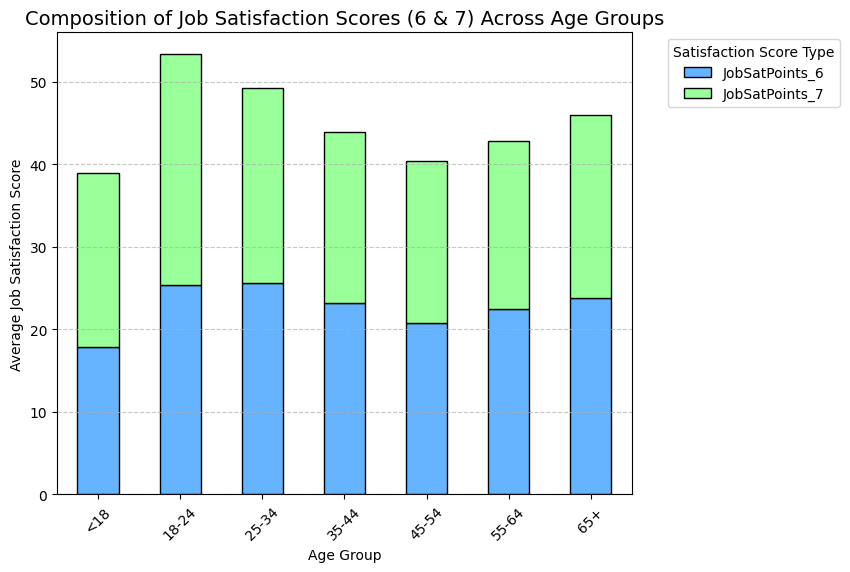

In [ ]:
# Select relevant columns
cols = ['AgeNumeric', 'JobSatPoints_6', 'JobSatPoints_7']
df_age_sat = df[cols].copy()

# Drop missing values
df_age_sat = df_age_sat.dropna(subset=['AgeNumeric', 'JobSatPoints_6', 'JobSatPoints_7'])

# Convert job satisfaction scores to numeric if necessary
df_age_sat['JobSatPoints_6'] = pd.to_numeric(df_age_sat['JobSatPoints_6'], errors='coerce')
df_age_sat['JobSatPoints_7'] = pd.to_numeric(df_age_sat['JobSatPoints_7'], errors='coerce')

# Define age bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_age_sat['AgeGroup'] = pd.cut(df_age_sat['AgeNumeric'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and calculate average satisfaction scores
age_group_sat = df_age_sat.groupby('AgeGroup', observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].mean() # Added observed=False

# Plot stacked bar chart
age_group_sat.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#66b3ff', '#99ff99'],
    edgecolor='black'
)

# Add chart labels and title
plt.title('Composition of Job Satisfaction Scores (6 & 7) Across Age Groups', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Average Job Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Satisfaction Score Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjusted legend position
plt.grid(axis='y', linestyle='--', alpha=0.7) # Added grid for better readability

# Adjust layout to prevent labels/legend from overlapping
plt.subplots_adjust(right=0.7) # Adjust right margin to make space for legend

plt.show()

In [ ]:
df['WorkExp'].unique()

array([nan, 17., 15., 12., 29., 10., 18., 16.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46., 43., 49., 47.])

In [ ]:
df_admire


,LanguageAdmired
1,Bash/Shell (all shells)
1,Go
1,HTML/CSS
1,Java
1,JavaScript
...,...
65454,Solidity
65454,SQL
65454,TypeScript
65456,C#


In [ ]:
# List of columns to drop
columns_to_drop = [
    'Frustration',
    'Frequency_1', 'Frequency_2', 'Frequency_3',
    'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4',
    'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9',
    'ICorPM',
    'TBranch',
    'AIChallenges',
    'AIEthics',
    'AIThreat',
    'AINextMuch less integrated',
    'AINextLess integrated',
    'AINextMore integrated',
    'AINextNo change',
    'AINextMuch more integrated',
    'AIToolNot interested in Using',
    'AIToolInterested in Using',
    'AIToolCurrently Using',
    'AIAcc',
    'AISent',
    'AIBen',
    'AISelect',
    'SOComm',
    'Age',
    'Country',
    'Check',
    'LearnCode',
    'LearnCodeOnline',
    'CodingActivities',
    'TechDoc',
    'BuyNewTool',
    'BuildvsBuy',
    'TechEndorse',
    'SOHow',
    'SOPartFreq',
    'NEWSOSites'
]

# Drop the columns safely (ignore if some columns are missing)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Optional: Verify the remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['ResponseId', 'MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmi

In [ ]:
list(df.columns)

['ResponseId',
 'MainBranch',
 'Employment',
 'RemoteWork',
 'EdLevel',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackAsyncAdmired',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith

In [ ]:
df

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,SurveyEase,ConvertedCompYearly,JobSat,country_clean,Continent,Currency_Clean,AgeNumeric,AgeGroup,JobSatPoints,income_group
0,1,I am a developer by profession,"Employed, full-time",Remote,Primary Education,20,NaN,Other / Unknown,Prefer_not_to_say,Prefer_not_to_say,...,NaN,NaN,NaN,United States,Unknown,Unknown,15.0,Under 18,NaN,Not reported
1,2,I am a developer by profession,"Employed, full-time",Remote,Bachelor’s Degree,20,17,Software Developer,Prefer_not_to_say,Prefer_not_to_say,...,NaN,NaN,NaN,United Kingdom,Unknown,Unknown,39.0,25-34,NaN,Not reported
2,3,I am a developer by profession,"Employed, full-time",Remote,Master’s Degree,37,27,Software Developer,Prefer_not_to_say,Prefer_not_to_say,...,Easy,NaN,NaN,United Kingdom,Unknown,Unknown,49.0,35-44,NaN,Not reported
3,4,I am learning to code,"Student, full-time",Prefer_not_to_say,DropOut,4,NaN,Software Developer,Prefer_not_to_say,Prefer_not_to_say,...,Easy,NaN,NaN,Canada,North America,Unknown,21.0,Under 18,NaN,Not reported
4,5,I am a developer by profession,"Student, full-time",Prefer_not_to_say,Secondary Education,9,NaN,Software Developer,Prefer_not_to_say,Prefer_not_to_say,...,Easy,NaN,NaN,Norway,Europe,Unknown,21.0,Under 18,NaN,Not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65452,35588,"I am not primarily a developer, but I write co...","Student, full-time;Employed, part-time",In-person,DropOut,7,2,Infrastructure & DevOps,100 to 499 employees,Strong Influence,...,Neither easy nor difficult,NaN,NaN,Germany,Europe,EUR,21.0,Under 18,NaN,Not reported
65453,50580,I am a developer by profession,"Employed, full-time;Employed, part-time",Remote,DropOut,6,3,Software Developer,2 to 9 employees,Strong Influence,...,Easy,NaN,9.0,Morocco,Africa,MAD,21.0,Under 18,41-50,Not reported
65454,9938,I am a developer by profession,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Master’s Degree,17,12,Research & Academia,"1,000 to 4,999 employees",Good Influence,...,Easy,997.0,4.0,Nigeria,Africa,NGN,39.0,25-34,NaN,997.0
65455,40874,I am a developer by profession,"Employed, full-time",Remote,DropOut,12,10,Software Developer,100 to 499 employees,Weak Infuence,...,Neither easy nor difficult,NaN,6.0,Germany,Europe,EUR,29.0,18-24,NaN,Not reported


In [ ]:
df

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,SurveyEase,ConvertedCompYearly,JobSat,country_clean,Continent,Currency_Clean,AgeNumeric,AgeGroup,JobSatPoints,income_group
0,1,I am a developer by profession,"Employed, full-time",Remote,Primary Education,20,NaN,Other / Unknown,Prefer_not_to_say,Prefer_not_to_say,...,NaN,NaN,NaN,United States,Unknown,Unknown,15.0,Under 18,NaN,Not reported
1,2,I am a developer by profession,"Employed, full-time",Remote,Bachelor’s Degree,20,17,Software Developer,Prefer_not_to_say,Prefer_not_to_say,...,NaN,NaN,NaN,United Kingdom,Unknown,Unknown,39.0,25-34,NaN,Not reported
2,3,I am a developer by profession,"Employed, full-time",Remote,Master’s Degree,37,27,Software Developer,Prefer_not_to_say,Prefer_not_to_say,...,Easy,NaN,NaN,United Kingdom,Unknown,Unknown,49.0,35-44,NaN,Not reported
3,4,I am learning to code,"Student, full-time",Prefer_not_to_say,DropOut,4,NaN,Software Developer,Prefer_not_to_say,Prefer_not_to_say,...,Easy,NaN,NaN,Canada,North America,Unknown,21.0,Under 18,NaN,Not reported
4,5,I am a developer by profession,"Student, full-time",Prefer_not_to_say,Secondary Education,9,NaN,Software Developer,Prefer_not_to_say,Prefer_not_to_say,...,Easy,NaN,NaN,Norway,Europe,Unknown,21.0,Under 18,NaN,Not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65452,35588,"I am not primarily a developer, but I write co...","Student, full-time;Employed, part-time",In-person,DropOut,7,2,Infrastructure & DevOps,100 to 499 employees,Strong Influence,...,Neither easy nor difficult,NaN,NaN,Germany,Europe,EUR,21.0,Under 18,NaN,Not reported
65453,50580,I am a developer by profession,"Employed, full-time;Employed, part-time",Remote,DropOut,6,3,Software Developer,2 to 9 employees,Strong Influence,...,Easy,NaN,9.0,Morocco,Africa,MAD,21.0,Under 18,41-50,Not reported
65454,9938,I am a developer by profession,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Master’s Degree,17,12,Research & Academia,"1,000 to 4,999 employees",Good Influence,...,Easy,997.0,4.0,Nigeria,Africa,NGN,39.0,25-34,NaN,997.0
65455,40874,I am a developer by profession,"Employed, full-time",Remote,DropOut,12,10,Software Developer,100 to 499 employees,Weak Infuence,...,Neither easy nor difficult,NaN,6.0,Germany,Europe,EUR,29.0,18-24,NaN,Not reported


In [ ]:
df_admire

,LanguageAdmired
1,Bash/Shell (all shells)
1,Go
1,HTML/CSS
1,Java
1,JavaScript
...,...
65454,Solidity
65454,SQL
65454,TypeScript
65456,C#


In [ ]:
lang

NameError: name 'lang' is not defined

In [ ]:
df_admire = df_admire.dropna(subset=['LanguageAdmired'])

In [ ]:
df_admire

In [ ]:
#df_admire.to_csv('DATA.csv2', index=False) # Save the DataFrame to a CSV file
#from google.colab import files

#files.download('DATA.csv2')

In [ ]:
df_main  = pd.read_csv('/content/df.csv9')
df_main.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()

In [ ]:
df_os = pd.read_csv('/content/df_os.csv2')
df_os.head()